UFRJ/COPPE/PEE<br>
COC800 Data Mining - Trabalho Final - Prof Alexandre G. Evsukoff<br>
Alunos: Gustavo Martins da Silva Nunes e Michel Morais Ferreira<br>


# Census Income Dataset

## 1. Introdução
<div align="justify"><br>
Este notebook apresenta o desenvolvimento realizado para o trabalho final da disciplina COC800 Data Mining no período letivo de 2018/1. 
</div>

### 1.1 Apresentação do Problema
<div align="justify"><br>
A base de dados [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) é um subconjunto dos dados obtidos no censo demográfico realizado nos Estados Unidos no ano de 1994[1]. O dataset a ser estudado possui 15 variáveis das 40 utilizadas no conjunto de dados do censo realizado[2], sendo 14 destas variáveis informações sobre a população, tais como idade, raça, profissão, horas de trabalho por semana entre outras, e uma variável que representa se o cidadão recebe anualmente mais de \$50.000 dólares ao ano ou não. A tarefa a ser realizada no estudo desse conjunto de dados é a tarefa de classificação dos cidadãos em duas classes: cidadãos com ganhos anuais iguais ou superiores a $50.000 por ano, ou cidadãos com ganhos inferiores a este. 
  
A escolha por este dataset foi motivada devido à variedade de informações a serem tratadas, tais como dados faltantes e a necessidade do tratamento de variáveis mistas(variáveis contínuas e variáveis categóricas), além do extenso número de artigos que foram escritos utilizando esta base de dados como base de comparação de performance de algoritmos de diversos modelos de aprendizado de máquinas.
</div>

### 1.2 Objetivo
<div align="justify"><br>
O trabalho tem como objetivo utilizar os modelos estudados durante o curso para classificarmos com a maior acurácia possível os cidadãos nos dois grupos de renda citados anteriormente. Após o treinamento dos modelos, será feita a comparação entre a performance dos modelos.
</div>

### 1.3 Apresentação da Tecnologia
<div align="justify"><br>
Devido à facilidade e experiência prévia dos participantes do grupo, a linguagem <i>Python</i> será utilizada para a realização do projeto. Devido à sua versatilidade, grande quantidade de materiais disponíveis na internet e muitas bibliotecas voltadas para análise de dados e criação de modelos de <i>machine learning</i>, a linguagem <i>Python</i> é uma excelente candidata para o projeto. 

Para a realização das análises dos dados serão usadas as bibliotecas mais utilizadas para este fim, sendo elas: <b><i>Numpy, Scipy e Pandas</i></b>. Para a visualização dos dados, serão utilizadas as bibliotecas <b><i>Matplotlib e Seaborn</i></b>. Para a construção dos modelos de aprendizado de máquinas, as bibliotecas utilizadas serão <b><i>Scikit-Learn, TensorFlow e Keras</i></b>
</div>

### 1.4 Caracterização e Visualização de Dados
<div align="justify"><br>
Será realizada a análise exploratória dos dados para a averiguação dos dados e compreensão dos mesmos. A fase de exploração de dados será decisiva para a construção de um modelo consistente para a classificação correta esperada pro problema. Após a análise exploratória, será realizado o pré-processamento dos dados, onde serão tratados dados faltantes, análise de outliers e o tratamento apropriado de cada tipo de variável(contínua ou categórica) para serem utilizadas como entrada para o modelo de aprendizado de máquinas.
</div>

## 2. Análise Exploratória dos Dados

In [1]:
# Importando os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Transformação do target e outras features em binárias: utilização de -1 para ganhos menores que 50K/Year, +1 para ganhos maiores de 50K/year
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

%matplotlib inline

# O arquivo de dados não possui headers; Incluir uma lista de nomes das features
features = ['age','workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','earnings']

# Importando os dados do dataset
training_data = pd.read_csv('Data/train.txt',names=features,index_col=False)
test_data = pd.read_csv('Data/test.txt',names=features,index_col=False)

# Amostrando o dataset, para trabalhar com uma porção menor do mesmo

training_data = training_data.sample(frac=0.1, replace=False, random_state=0)

#### 2.1 Verificando os dados do conjunto de treinamento

In [2]:
# Verificando a base de treinamento 
print('Quantidade de exemplos presentes na base: {}\nQuantidade de features presentes na base: {}'.format(*training_data.shape))

Quantidade de exemplos presentes na base: 3256
Quantidade de features presentes na base: 15


In [3]:
# Exemplos da base
training_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
22278,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
8950,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
16505,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
19140,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [4]:
# Verificando os tipos de dados presentes
print('Tipos de dados presentes nas bases de dados:\n\n{}'.format(training_data.dtypes))

Tipos de dados presentes nas bases de dados:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earnings          object
dtype: object


##### 2.1.1 Tratando registros faltantes

Porcentagem de registros com valores faltantes: 7.52


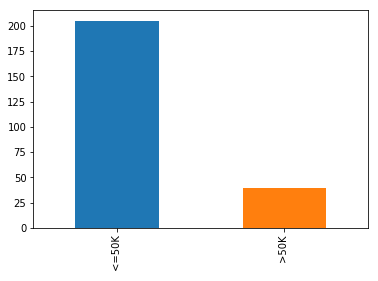

In [5]:
# Computando a quantidade de registros que contém, pelo menos, uma feature com valor faltante

indices_linhas_registros_com_valores_faltantes = set()
qtd_valores_faltantes_por_registro = dict()

for lin in training_data.index.values:
    for col in training_data.columns.values:
        if training_data.at[lin,col] == ' ?':
            indices_linhas_registros_com_valores_faltantes.add(lin)
#             continue # pula para o próximo registro
            if lin in qtd_valores_faltantes_por_registro:
                qtd_valores_faltantes_por_registro[lin] += 1
            else:
                qtd_valores_faltantes_por_registro[lin] = 1
            
porcentagem_registros_com_valores_faltantes = (len(indices_linhas_registros_com_valores_faltantes)/training_data.shape[0])*100
print('Porcentagem de registros com valores faltantes: %.2f' % porcentagem_registros_com_valores_faltantes)

# Mostrando quantos desses registros estão associados a cada classe (<=50k e >50k)

training_data.loc[indices_linhas_registros_com_valores_faltantes,'earnings'].value_counts().plot.bar()
plt.show()

Como tratar esses valores faltantes? Será que podemos jogar fora?

Em vez de jogar os registros que contêm valores faltantes fora, tentei treinar classificadores para prever os valores faltantes de certas features do dataset. O treino dos classificadores abaixo foi feito sem nenhum cuidado quanto a validação cruzada, avaliação de performance (overfitting, entre outros...). Esse treino foi só uma tentativa rápida de estimar esses valores, para que possamos continuar a análise exploratória. No entanto, acho que esse treino deve ser visto com mais cuidado... Além disso, não tratei nenhuma feature antes de treinar os classificadores (exceto fazer a representação maximamente esparsa das features categóricas, sendo que só fiz isso, porque a árvore de decisão do scikit-learn não aceita valores nominais no treino do modelo). Não tenho certeza, mas acho que as features numéricas não precisam ser pré-tratadas (por exemplo, fazendo a normalização do z-score) para esse tipo de modelo, uma vez que o que importa é a ordem dos valores numéricos. 


Do jeito que o treino está feito, por conta do alto desbalanceamento das features native-country e workclass, creio que o classificador deva estar favorecendo as categorias mais frequentes em cada caso (United-States e Private, respectivamente). Com isso, não sei se o que está sendo feito é muito diferente de substituir os valores faltantes em tais features pela moda de cada uma. De uma forma geral, não sei se essa abordagem (de tentar prever os valores faltantes por esses classificadores) está adequada, por conta do jeito que o treino foi realizado...

In [6]:
# Treinando árvores de decisão para prever os valores faltantes das features workclass, occupation e native-country

# Transformação de valores distintos de features categóricas para labels enumeradas
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_country = LabelEncoder()

# Árvore de decisão usada para estimar valores faltantes no dataset
from sklearn.tree import DecisionTreeClassifier

# Base de treino para as árvores: registros que não contêm valores faltantes
train_samples_missing_values = training_data.copy()
train_samples_missing_values = train_samples_missing_values[~train_samples_missing_values.index.isin(indices_linhas_registros_com_valores_faltantes)]

# Base de teste para as árvores: Registros com valores faltantes
test_samples_missing_values = training_data.copy()
test_samples_missing_values = test_samples_missing_values[test_samples_missing_values.index.isin(indices_linhas_registros_com_valores_faltantes)]

# Um classificador para cada feature que apresenta valores faltantes
tg = train_samples_missing_values[['workclass', 'occupation', 'native-country']]
tg1 = label_encoder_workclass.fit_transform(tg.workclass.values)
tg2 = label_encoder_occupation.fit_transform(tg.occupation.values)
tg3 = label_encoder_country.fit_transform(tg['native-country'].values)

# Remove dos registros sem valores faltantes as features target (workclass, occupation e native-country) para cada classificador e a feature education, porque ela é redundante com a feature education-num
train_samples_missing_values = train_samples_missing_values.drop(columns=['workclass', 'occupation', 'native-country', 'education'])
train_samples_missing_values = pd.get_dummies(train_samples_missing_values)
train_samples_missing_values= train_samples_missing_values.drop(columns=['marital-status_ Married-AF-spouse']) # considerado outlier: baixa representatividade (só uma amostra dessa classe no dataset de treino considerado)

# Remove dos registros com valores faltantes as features target para cada classificador e a feature education, pelo mesmo motivo descrito anteriormente
test_samples_missing_values = test_samples_missing_values.drop(columns=['workclass', 'occupation', 'native-country', 'education'])
test_samples_missing_values = pd.get_dummies(test_samples_missing_values)

# Inicializa e treina as três árvores
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(train_samples_missing_values,tg1)
dt2.fit(train_samples_missing_values,tg2)
dt3.fit(train_samples_missing_values,tg3)

import sklearn.tree as skt

skt.export_graphviz(dt1, out_file='tree1.dot')

predictions_workclass = dt1.predict(test_samples_missing_values.values)
training_data.at[indices_linhas_registros_com_valores_faltantes, 'workclass'] = label_encoder_workclass.inverse_transform(predictions_workclass)

skt.export_graphviz(dt2, out_file='tree2.dot')

predictions_occupation = dt2.predict(test_samples_missing_values.values)
training_data.at[indices_linhas_registros_com_valores_faltantes, 'occupation'] = label_encoder_occupation.inverse_transform(predictions_occupation)

skt.export_graphviz(dt3, out_file='tree3.dot')

predictions_country = dt3.predict(test_samples_missing_values.values)
training_data.at[indices_linhas_registros_com_valores_faltantes, 'native-country'] = label_encoder_country.inverse_transform(predictions_country)

/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to c

#### 2.2 Análise de features categóricas

In [7]:
# Verificando as variáveis categóricas 
training_data_categorical = training_data.select_dtypes(include=['object'])
training_data_categorical.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,earnings
22278,Private,Some-college,Divorced,Adm-clerical,Unmarried,White,Female,United-States,<=50K
8950,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
7838,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
16505,Private,5th-6th,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,United-States,<=50K
19140,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male,United-States,>50K


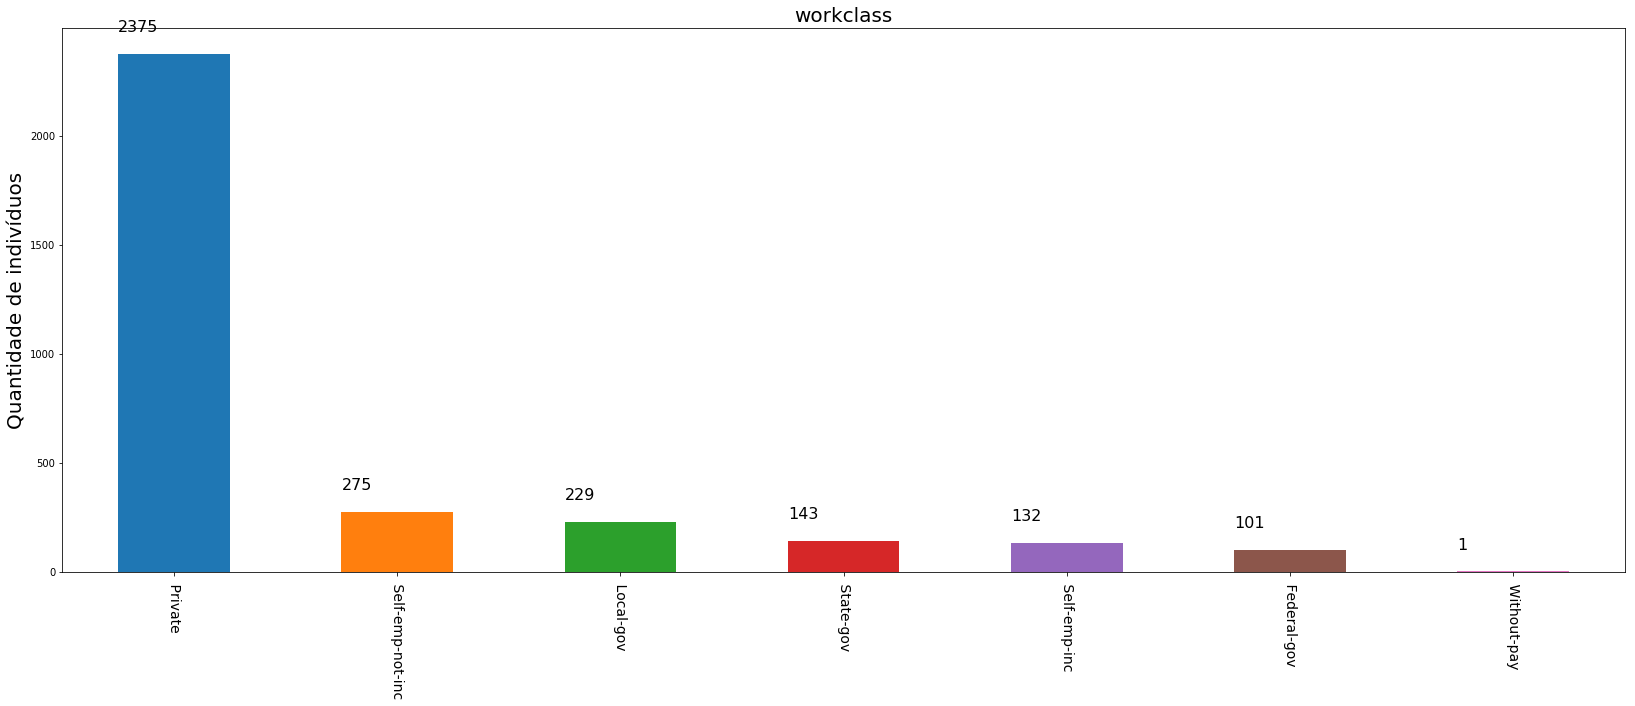

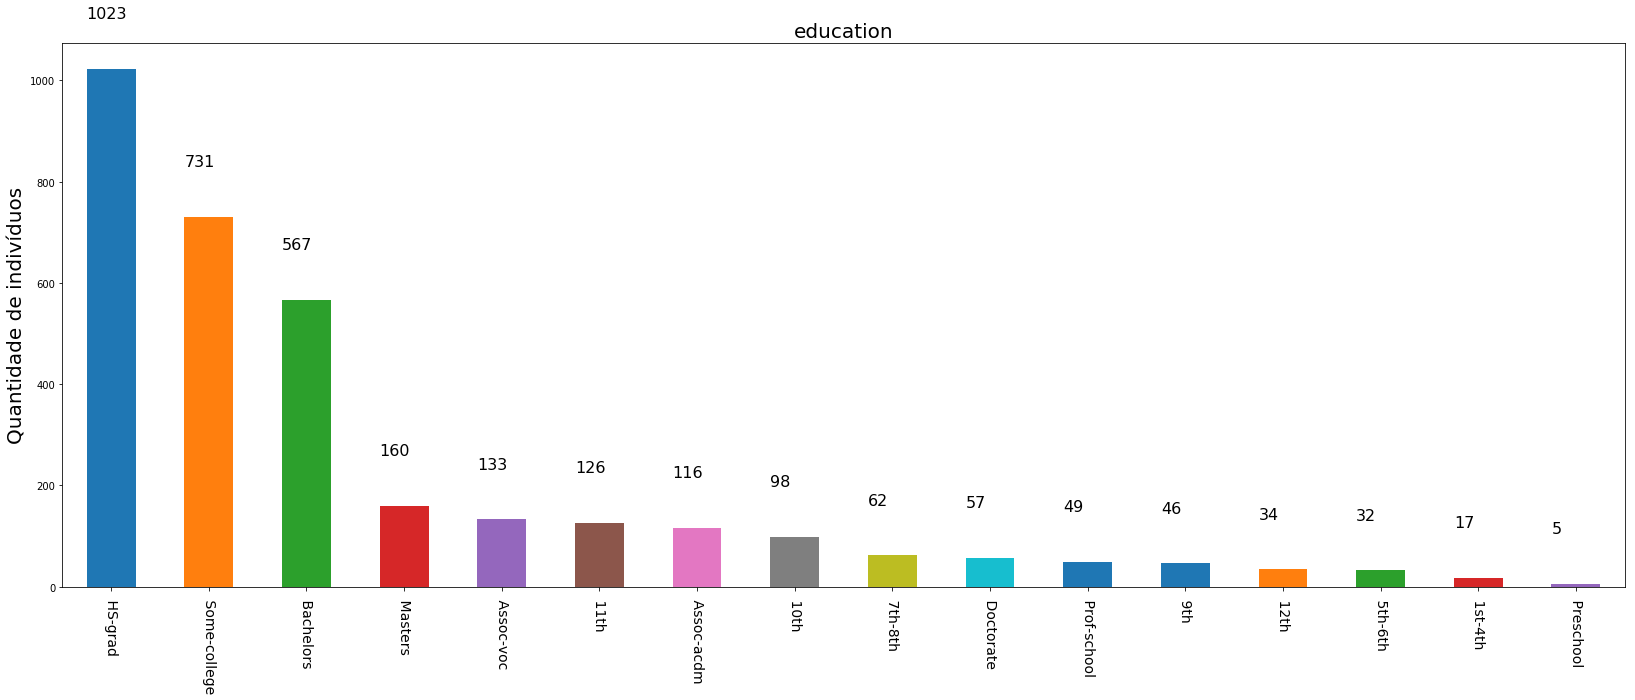

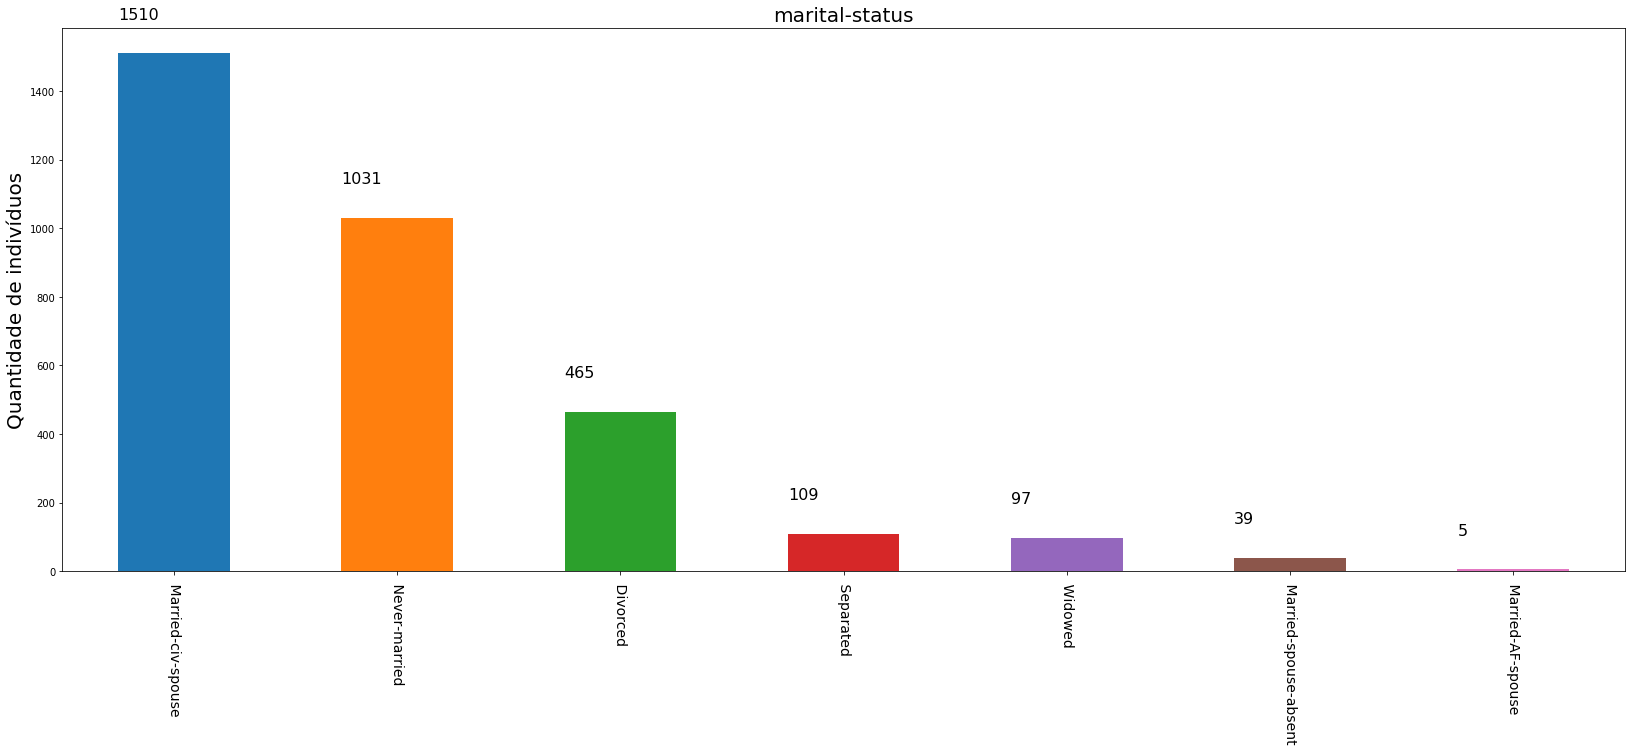

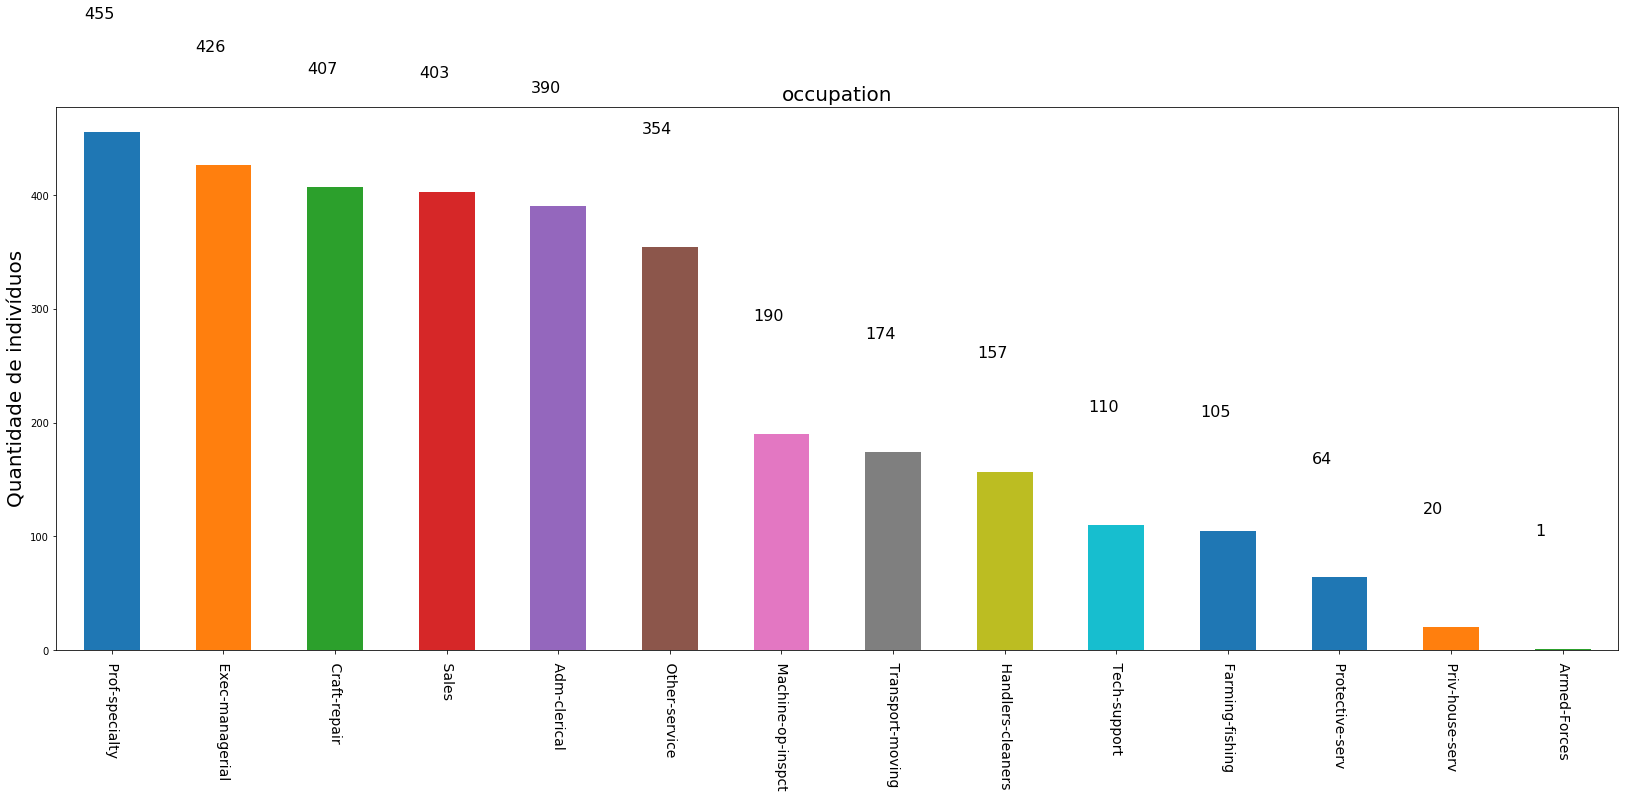

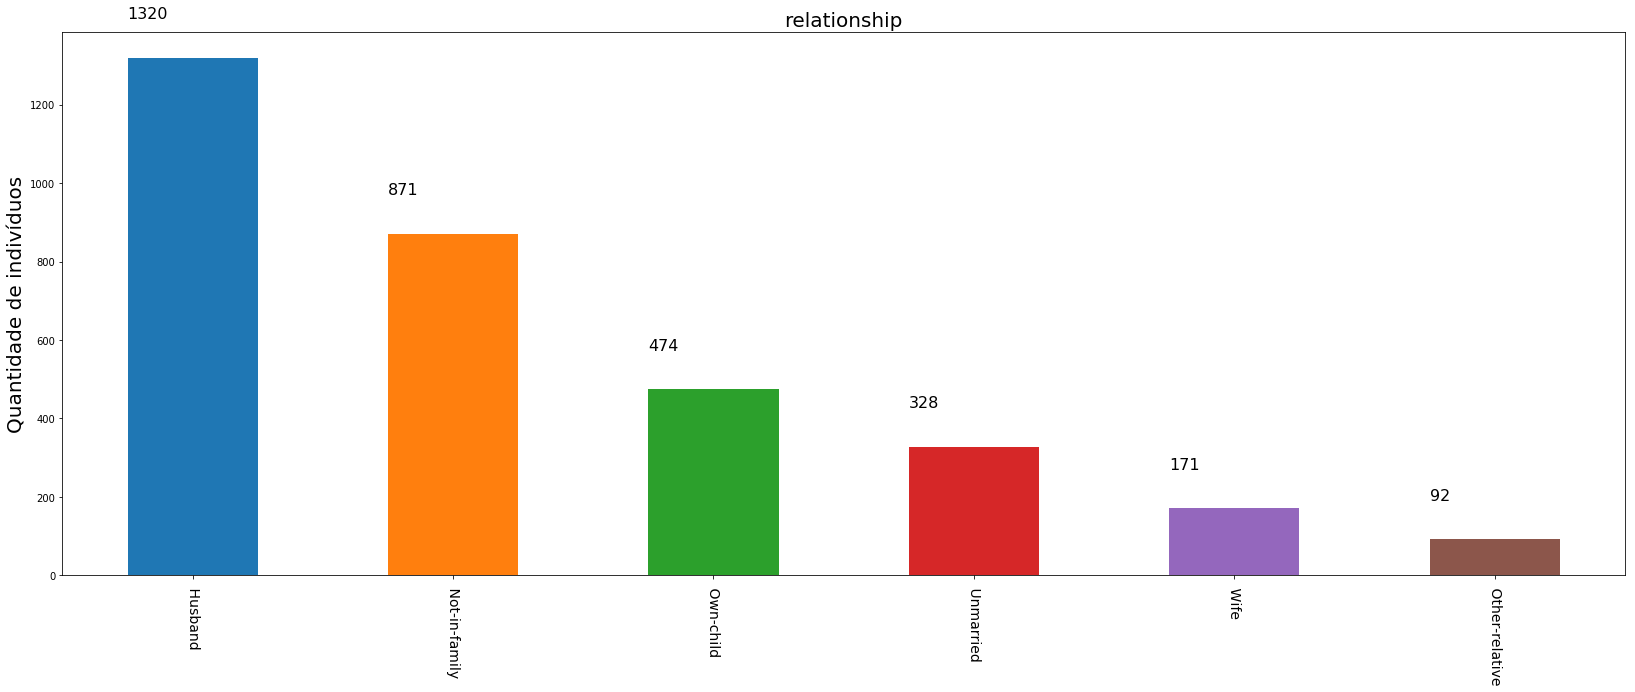

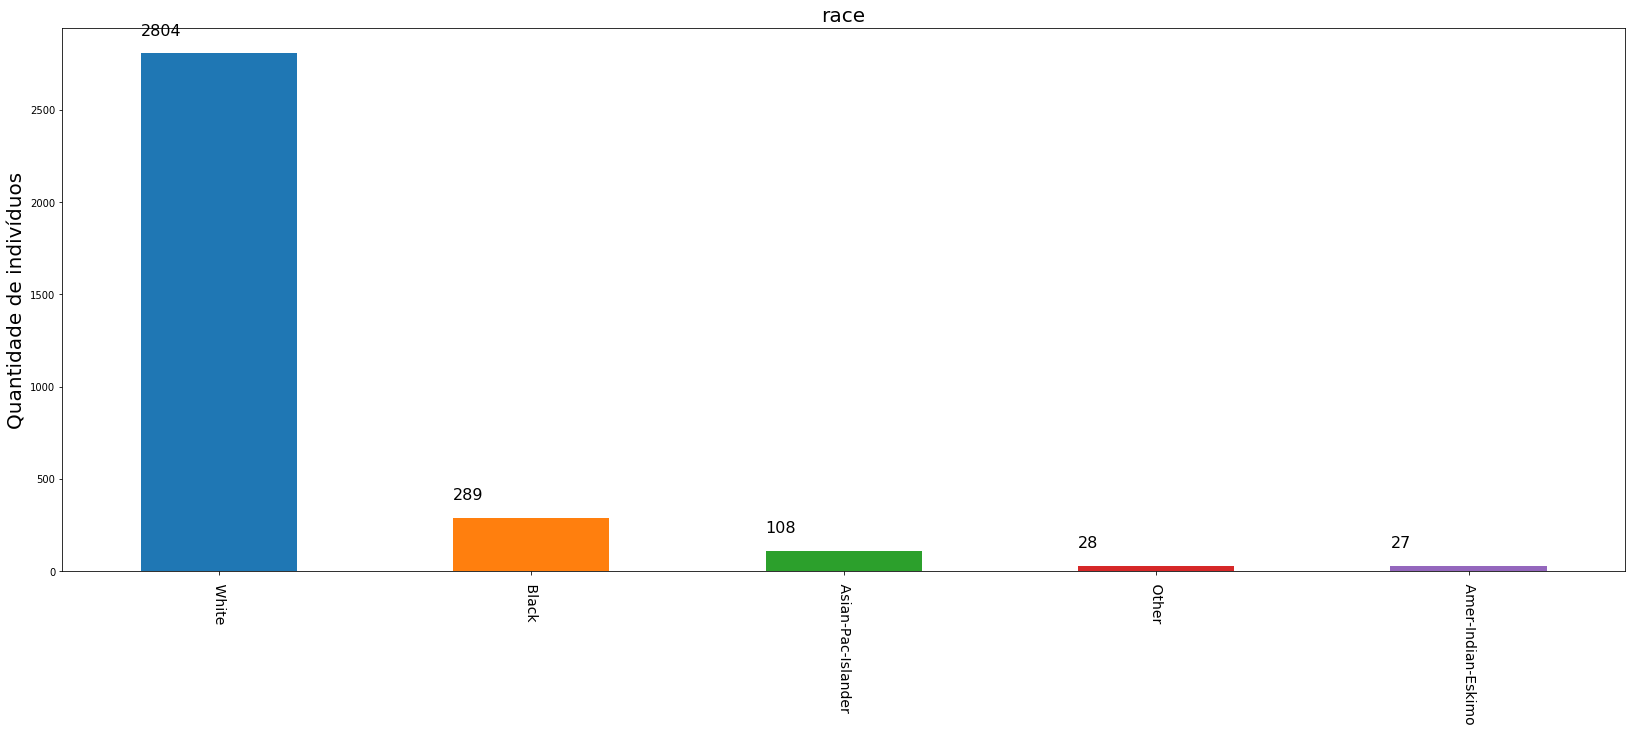

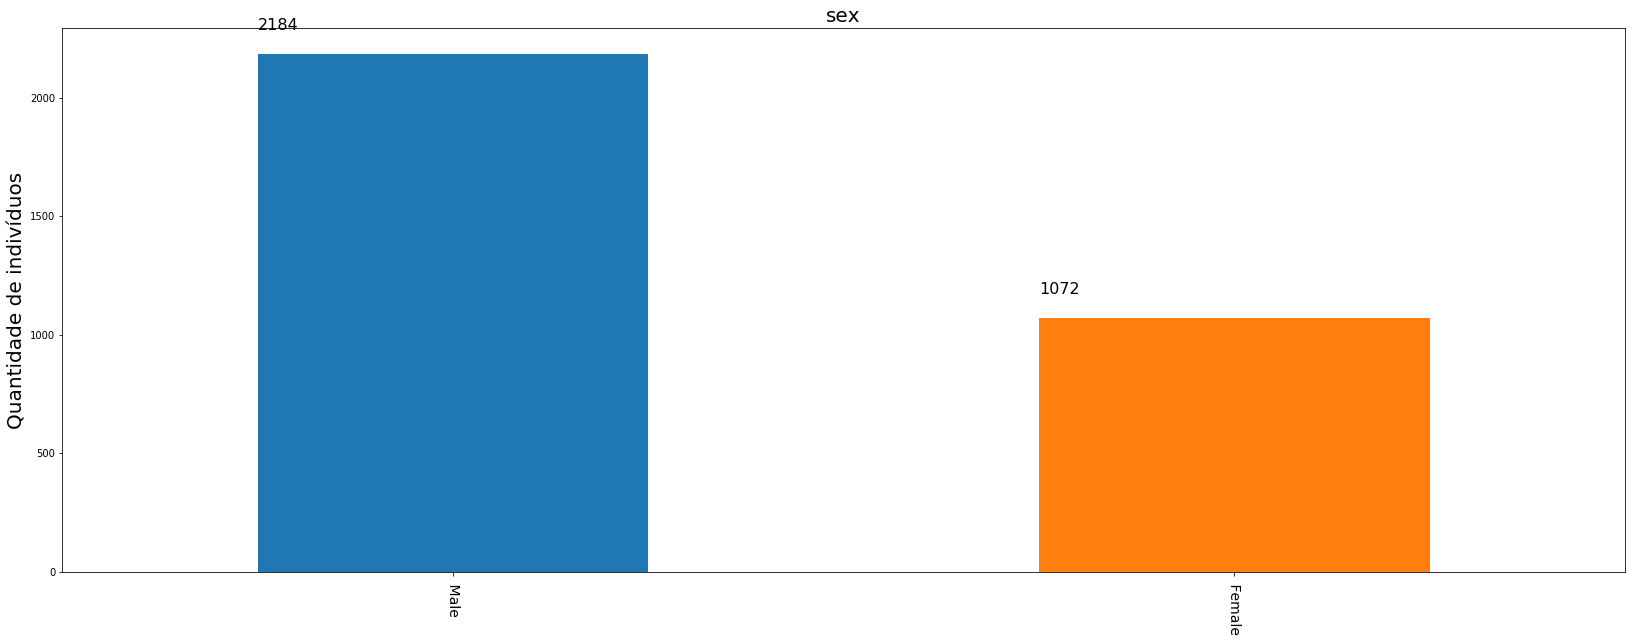

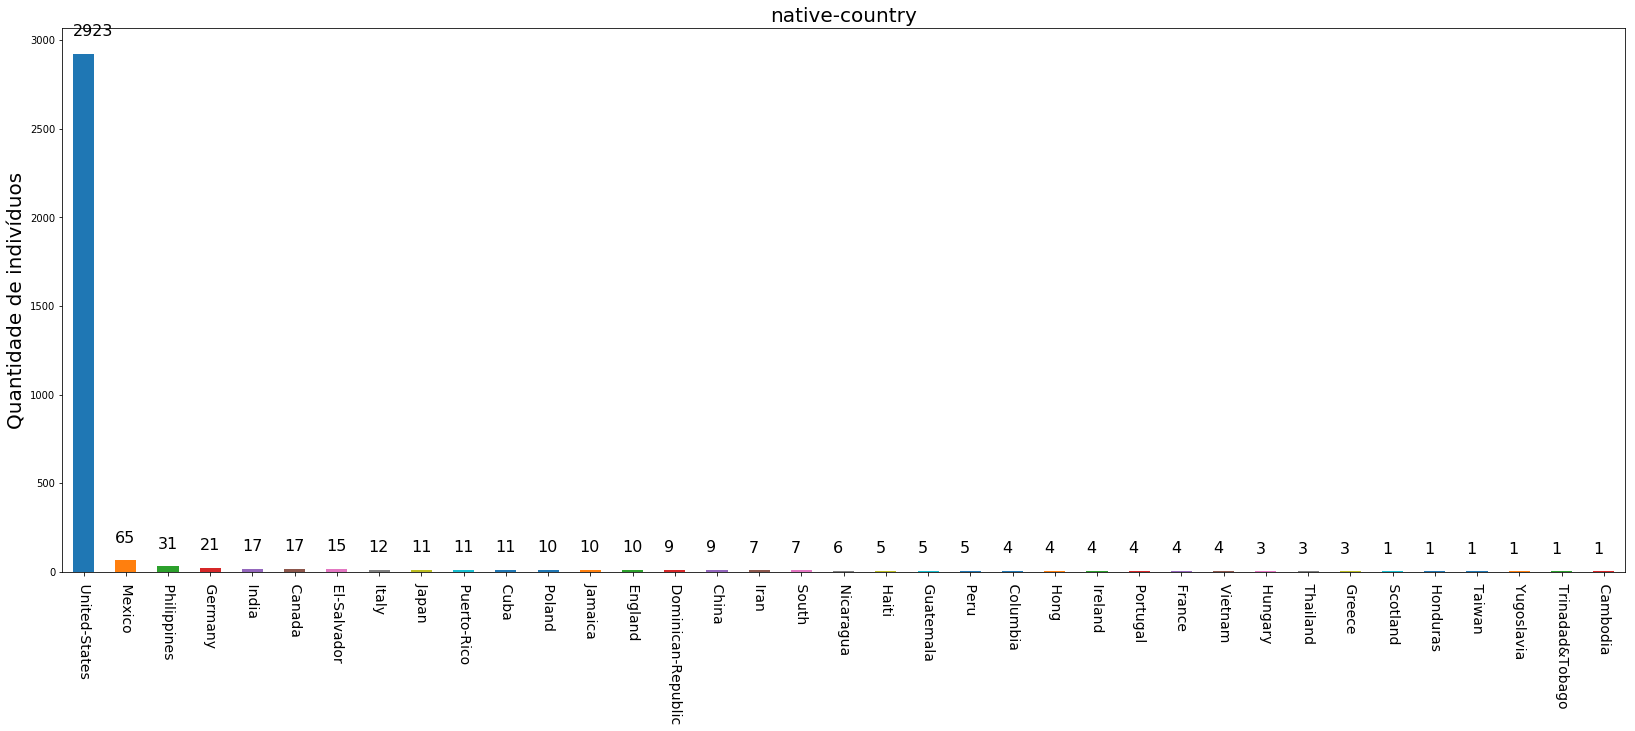

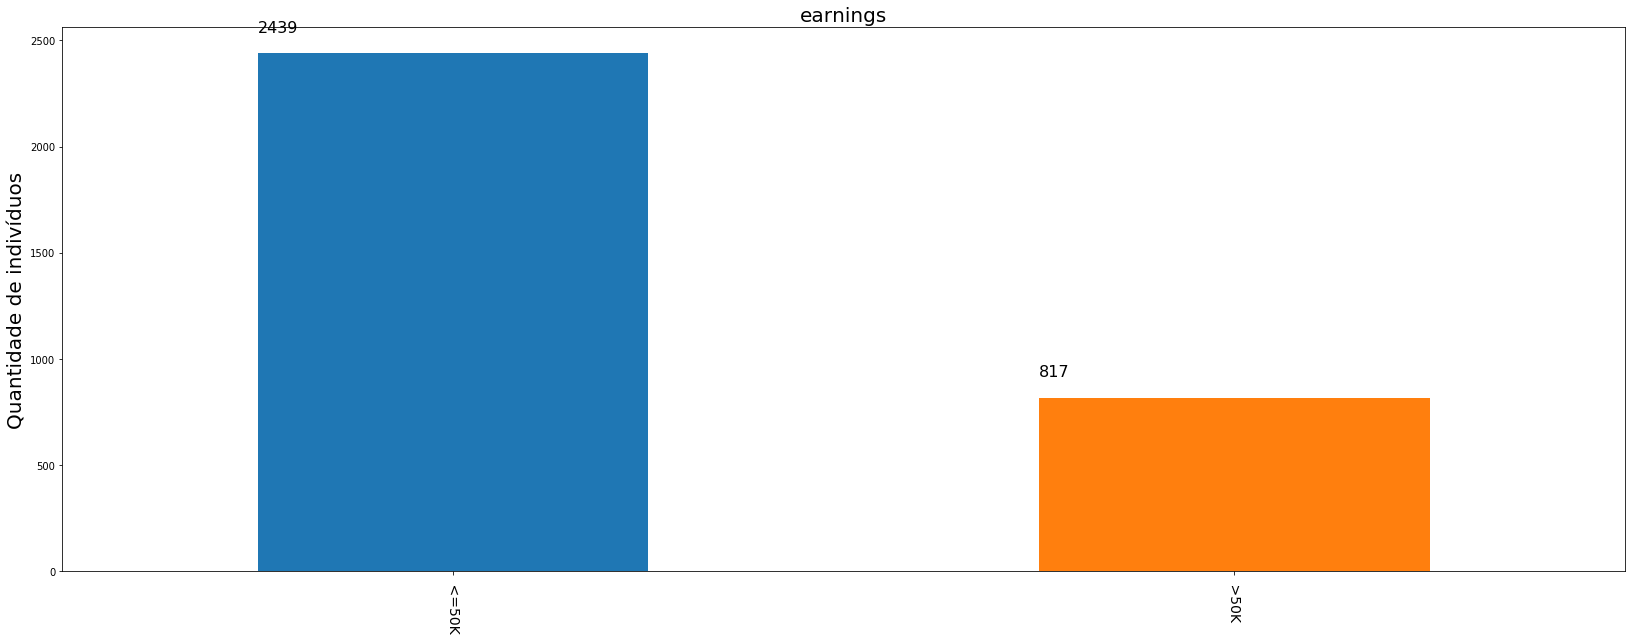

In [8]:
# Quais os possíveis valores para cada feature?
for feature in list(training_data_categorical.columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    ax = training_data_categorical[feature].value_counts().plot.bar()
    ax.set_alpha(0.8)
        
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height() + 100, str(patch.get_height()),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)
        
plt.show()

Pelos gráficos anteriores, é possível perceber um grande desbalanceamento entre os possíveis valores de diversas features categóricas. Dessa forma, categorias pouco frequentes em uma dada feature podem ser combinadas, de modo a reduzir a quantidade de categorias disponíveis e simplificar a análise.

In [9]:
# Salvando os targets e removendo do dataframe das categóricas e do dataframe das numéricas

targets = training_data_categorical['earnings']
training_data_categorical = training_data_categorical.drop(columns=['earnings'])
training_data = training_data.drop(columns=['earnings'])

##### 2.2.1 Tratando a feature native-country

In [10]:
# Analisando a feature native-country

country_frequency = training_data_categorical['native-country'].value_counts()/training_data_categorical.shape[0] # Porcentagem de cada classe no dataset
print(country_frequency)

 United-States         0.897727
 Mexico                0.019963
 Philippines           0.009521
 Germany               0.006450
 India                 0.005221
 Canada                0.005221
 El-Salvador           0.004607
 Italy                 0.003686
 Japan                 0.003378
 Puerto-Rico           0.003378
 Cuba                  0.003378
 Poland                0.003071
 Jamaica               0.003071
 England               0.003071
 Dominican-Republic    0.002764
 China                 0.002764
 Iran                  0.002150
 South                 0.002150
 Nicaragua             0.001843
 Haiti                 0.001536
 Guatemala             0.001536
 Peru                  0.001536
 Columbia              0.001229
 Hong                  0.001229
 Ireland               0.001229
 Portugal              0.001229
 France                0.001229
 Vietnam               0.001229
 Hungary               0.000921
 Thailand              0.000921
 Greece                0.000921
 Scotlan

Dado que quase 90% dos valores de "native-country" são United-States, e que nenhum outro país atinge uma frequência de 5% no dataset (e nem mesmo 2%), transforma-se a feature "native-country" em uma nova feature "is_from_US", que indica se o registro corresponde a United-States ou não.

In [11]:
# Criando a feature "is_from_US"

for idx in training_data.index.values:
    country_str = str.strip(training_data.at[idx,'native-country'])
    training_data.at[idx,'native-country'] = 1 if country_str == 'United-States' else 0


In [12]:
# Renomeando a coluna native-country para is_from_US e mudando o tipo da coluna

training_data = training_data.rename(columns={"native-country": "is_from_US"})
training_data['is_from_US'] = pd.to_numeric(training_data['is_from_US'])
training_data_categorical = training_data_categorical.drop(columns=["native-country"])

training_data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex
22278,Private,Some-college,Divorced,Adm-clerical,Unmarried,White,Female
8950,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female
7838,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male
16505,Private,5th-6th,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male
19140,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male


##### 2.2.2 Tratando a feature education

A feature education contém os possíveis níveis de educação que os entrevistados podem ter (Highschool grad, Bachelor, Master...). Nos dados originais, porém, existe uma coluna, chamada 'education-num' que faz uma representação ordinal dos diferentes níveis de educação possíveis. Como, nesse caso, faz sentido esse tipo de caracterização (por exemplo, a distância entre master e doctorate é menor do que doctorate e highschool grad, e isso é representado pelo atributo ordinal), então, optou-se, por ora, em retirar a feature 'education' do dataset.

In [13]:
# Tratando a feature education

training_data = training_data.drop(columns=['education'])
training_data_categorical = training_data_categorical.drop(columns=['education'])

training_data_categorical.head()

,workclass,marital-status,occupation,relationship,race,sex
22278,Private,Divorced,Adm-clerical,Unmarried,White,Female
8950,Private,Never-married,Prof-specialty,Not-in-family,White,Female
7838,Private,Married-civ-spouse,Sales,Husband,White,Male
16505,Private,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male
19140,Private,Divorced,Transport-moving,Not-in-family,White,Male


##### 2.2.3 Tratando a feature sex

Como a feature sex só tem dois valores possíveis (Male e Female), ela é, essencialmente, uma feature do tipo binária. Tal conversão é feita a seguir.

In [14]:
# Convertendo a feature sex em binária

training_data['sex'] = label_binarizer.fit_transform(training_data['sex'])

# Renomeando a coluna sex para is_male

training_data = training_data.rename(columns={'sex': 'is_male'})

# Removendo a coluna sex do dataframe das features categóricas
training_data_categorical = training_data_categorical.drop(columns=['sex'])

training_data_categorical.head()

,workclass,marital-status,occupation,relationship,race
22278,Private,Divorced,Adm-clerical,Unmarried,White
8950,Private,Never-married,Prof-specialty,Not-in-family,White
7838,Private,Married-civ-spouse,Sales,Husband,White
16505,Private,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo
19140,Private,Divorced,Transport-moving,Not-in-family,White


##### 2.2.4 Tratando a feature race

In [15]:
# Analisando a feature race

race_frequency = (training_data_categorical['race'].value_counts()/training_data_categorical.shape[0])*100
print(race_frequency)

 White                 86.117936
 Black                  8.875921
 Asian-Pac-Islander     3.316953
 Other                  0.859951
 Amer-Indian-Eskimo     0.829238
Name: race, dtype: float64


Como as categorias Asian-Pac-Islander, Other e Amer-Indian-Eskimo têm representatividade menor do que 5%, essas categorias são condensadas em uma categoria somente, chamada Other.

White: 2804
Black: 289
Other: 163



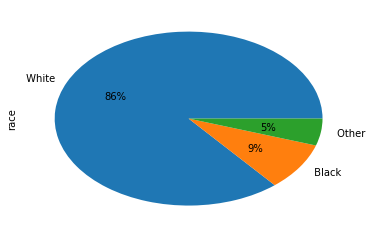

In [16]:
# Agrupando as categorias em race

categories_to_merge = set({'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'})

for idx in training_data_categorical.index.values:
    race_str = str.strip(training_data_categorical.at[idx,'race'])
    if race_str in categories_to_merge:
        training_data_categorical.at[idx,'race'] = ' Other'

print('White: {0}\nBlack: {1}\nOther: {2}\n'.format(*list(training_data_categorical['race'].value_counts())))
training_data_categorical['race'].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

# Removendo a coluna race do dataframe original

training_data = training_data.drop(columns=['race'])

##### 2.2.5 Tratando a feature workclass

In [17]:
# Analisando a feature workclass

workclass_frequency = (training_data_categorical['workclass'].value_counts()/training_data_categorical.shape[0])*100
print(workclass_frequency)

 Private             72.942260
 Self-emp-not-inc     8.445946
 Local-gov            7.033170
 State-gov            4.391892
 Self-emp-inc         4.054054
 Federal-gov          3.101966
 Without-pay          0.030713
Name: workclass, dtype: float64


Como muitas categorias da feature workclass têm baixa representatividade (< 5%), novamente, serão criados novos grupos, que juntam diferentes categorias. Para o caso em questão, todas as workclass do tipo "gov" serão agrupadas em "Gov-emp" e as workclass do tipo "self-emp" e "without-pay" serão agrupadas em "other".

Private = Private

Gov = Local-gov, State-gov, Federal-gov

Other = Self-emp-inc, Self-emp-not-inc, Without-pay

 Private    72.942260
 Gov        14.527027
 Other      12.530713
Name: workclass, dtype: float64


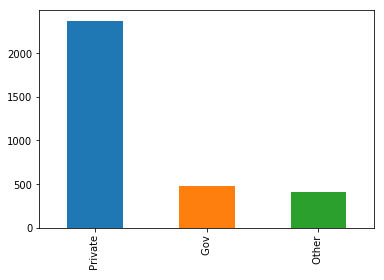

In [18]:
# Tratando a feature workclass

for idx in training_data_categorical.index.values:
    workclass_str = str.strip(training_data_categorical.at[idx, 'workclass'])
    if workclass_str in {'Local-gov', 'State-gov', 'Federal-gov'}:
        training_data_categorical.at[idx,'workclass'] = ' Gov'
    elif workclass_str in {'Self-emp-inc', 'Self-emp-not-inc', 'Without-pay'}:
        training_data_categorical.at[idx,'workclass'] = ' Other'
    elif workclass_str == 'Private':
        training_data_categorical.at[idx,'workclass'] = ' Private'
        
print((training_data_categorical['workclass'].value_counts()/training_data_categorical.shape[0])*100)
training_data_categorical['workclass'].value_counts().plot.bar()
plt.show()

# Removendo a coluna workclass do dataframe sem as features categóricas

training_data = training_data.drop(columns=['workclass'])

##### 2.2.6 Tratando a feature marital-status

In [19]:
# Analisando a feature marital-status

marital_status_frequency = (training_data_categorical['marital-status'].value_counts()/training_data_categorical.shape[0])*100
print(marital_status_frequency)

 Married-civ-spouse       46.375921
 Never-married            31.664619
 Divorced                 14.281327
 Separated                 3.347666
 Widowed                   2.979115
 Married-spouse-absent     1.197789
 Married-AF-spouse         0.153563
Name: marital-status, dtype: float64


Quatro categorias da feature marital-status têm baixa representatividade (< 5%). Dessa forma, elas serão incorporadas em outras categorias. Uma possibilidade consiste em dividir marital-status em 3 grandes categorias: Casado atualmente (currently-married), Casado uma vez (once-married) e nunca casado (never-married). Nesse novo agrupamento, o grupo married inclui pessoas casadas legalmente. Nos EUA, separated consiste em um casal que não vive mais junto, porém continua legalmente casado (fonte: http://www.attorneys.com/divorce/legal-separation-versus-divorce). Sendo assim, as 3 grandes categorias seriam:

Currently Married = Married-civ-spouse, Separated, Married-spouse-absent e Married-AF-spouse

Once Married = Divorced, Widowed

Never Married = Never-married

 Currently Married    51.074939
 Never Married        31.664619
 Once Married         17.260442
Name: marital-status, dtype: float64


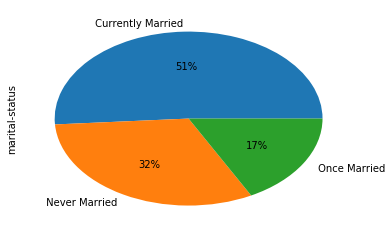

In [20]:
# Tratando a feature marital-status

for idx in training_data_categorical.index.values:
    marital_str = str.strip(training_data_categorical.at[idx, 'marital-status'])
    if marital_str in {'Married-civ-spouse', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'}:
        training_data_categorical.at[idx, 'marital-status'] = ' Currently Married'
    elif marital_str in {'Divorced', 'Widowed'}:
        training_data_categorical.at[idx, 'marital-status'] = ' Once Married'
    elif marital_str == 'Never-married':
        training_data_categorical.at[idx, 'marital-status'] = ' Never Married'

print((training_data_categorical['marital-status'].value_counts()/training_data_categorical.shape[0])*100)
training_data_categorical['marital-status'].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

training_data_categorical.head()

# Removendo a coluna marital-status do dataframe sem categóricas

training_data = training_data.drop(columns=['marital-status'])

##### 2.2.7 Tratando a feature relationship

In [21]:
# Analisando a feature relationship

relationship_frequency = (training_data_categorical['relationship'].value_counts()/training_data_categorical.shape[0])*100
print(relationship_frequency)

 Husband           40.540541
 Not-in-family     26.750614
 Own-child         14.557740
 Unmarried         10.073710
 Wife               5.251843
 Other-relative     2.825553
Name: relationship, dtype: float64


Pelos resultados acima, a feature relationship diz respeito ao relacionamento do indíviduo em questão com a pessoa que é dona ou inquilina do imóvel que tal indíviduo habita (fonte: https://www2.census.gov/programs-surveys/acs/about/qbyqfact/2016/Relationship.pdf). Aqui, como a categoria Other-relative tem representatividade abaixo de 5% no dataset, ela será combinada com a categoria Own-child. O nome do novo grupo será Other-relative.

Other-relative = Own-child e Other-relative.

 Husband           40.540541
 Not-in-family     26.750614
 Other-relative    17.383292
 Unmarried         10.073710
 Wife               5.251843
Name: relationship, dtype: float64


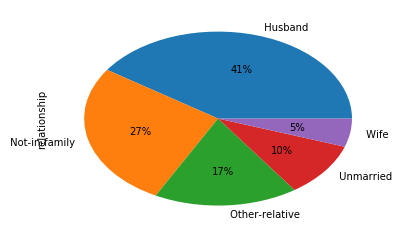

In [22]:
# Tratando a feature relationship

for idx in training_data_categorical.index.values:
    relationship_str = str.strip(training_data_categorical.at[idx,'relationship'])
    if relationship_str in {'Own-child', 'Other-relative'}:
        training_data_categorical.at[idx,'relationship'] = ' Other-relative'
        
print((training_data_categorical['relationship'].value_counts()/training_data_categorical.shape[0])*100)
training_data_categorical['relationship'].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

# Removendo a feature relationship do dataframe sem categóricas

training_data = training_data.drop(columns=['relationship'])

##### 2.2.8 Tratando a feature occupation

In [23]:
# Analisando a feature occupation

occupation_frequency = (training_data_categorical['occupation'].value_counts()/training_data_categorical.shape[0])*100
print(occupation_frequency)

 Prof-specialty       13.974201
 Exec-managerial      13.083538
 Craft-repair         12.500000
 Sales                12.377150
 Adm-clerical         11.977887
 Other-service        10.872236
 Machine-op-inspct     5.835381
 Transport-moving      5.343980
 Handlers-cleaners     4.821867
 Tech-support          3.378378
 Farming-fishing       3.224816
 Protective-serv       1.965602
 Priv-house-serv       0.614251
 Armed-Forces          0.030713
Name: occupation, dtype: float64


As categorias dessa feature encontram-se bem distribuidas. As categorias com baixa representatividade (todas abaixo de "Other-service") serão agrupadas com outras categorias. Uma nova categoria será criada, chamada "Blue-Collar", que englobará as categorias Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners e Tech-support (que são categorias envolvendo trabalhos mais manuais em indústrias). Priv-house-serv não é categorizado junto com Blue-Collar, porque o ambiente de trabalho é em domicílio. Essa categoria, junto com Protective-serv (serviços de proteção, como policiais, bombeiros...), Farming-fishing e Armed-Forces serão englobadas na categoria "Other-service". As demais categorias continuarão como estão. Resumindo, então:

Blue-Collar = Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners e Tech-support

Other-service = Priv-house-serv, Protective-serv, Farming-fishing, Armed-Forces e Other-service

 Blue-Collar        31.879607
 Other-service      16.707617
 Prof-specialty     13.974201
 Exec-managerial    13.083538
 Sales              12.377150
 Adm-clerical       11.977887
Name: occupation, dtype: float64


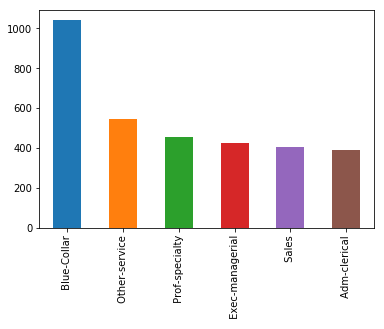

In [24]:
# Tratando a feature occupation

for idx in training_data_categorical.index.values:
    occupation_str = str.strip(training_data_categorical.at[idx, 'occupation'])
    if occupation_str in {'Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Tech-support'}:
        training_data_categorical.at[idx,'occupation'] = ' Blue-Collar'
    elif occupation_str in {'Priv-house-serv', 'Protective-serv', 'Farming-fishing', 'Armed-Forces', 'Other-service'}:
        training_data_categorical.at[idx,'occupation'] = ' Other-service'
        
print((training_data_categorical['occupation'].value_counts()/training_data_categorical.shape[0])*100)
training_data_categorical['occupation'].value_counts().plot.bar()
plt.show()

# Removendo a feature occupation do dataframe sem categóricas

training_data = training_data.drop(columns=['occupation'])

In [25]:
# # Dividindo as variáveis categóricas restantes em dummies

# training_data_categorical_ext = pd.get_dummies(training_data_categorical)
# training_data_aux = training_data.drop(axis=1, labels=list(training_data_categorical.columns.values))

# # Montando o dataset com as variáveis dummies
# training_data_with_dummies = pd.concat([training_data_aux, training_data_categorical_ext], axis=1)
# training_data_with_dummies.head()

In [26]:
# Calculando a matriz de correlação dos dados

# plt.matshow(training_data_with_dummies.corr())
# plt.show()

# training_data_categorical['native-country'].value_counts()/(training_data_categorical.shape[0])

#### 2.3 Análise das features numéricas

In [27]:
training_data.describe()

,age,fnlwgt,education-num,is_male,capital-gain,capital-loss,hours-per-week,is_from_US
count,3256.000000,3.256000e+03,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,39.007371,1.901016e+05,10.130528,0.670762,1081.858722,96.888206,40.494165,0.897727
std,13.790397,1.077692e+05,2.587072,0.470009,7268.680401,419.620619,12.731106,0.303053
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.170615e+05,9.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.500000,1.777440e+05,10.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,49.000000,2.364035e+05,13.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.455435e+06,16.000000,1.000000,99999.000000,2824.000000,99.000000,1.000000


##### 2.3.1 Análise da feature <i>Age</i>

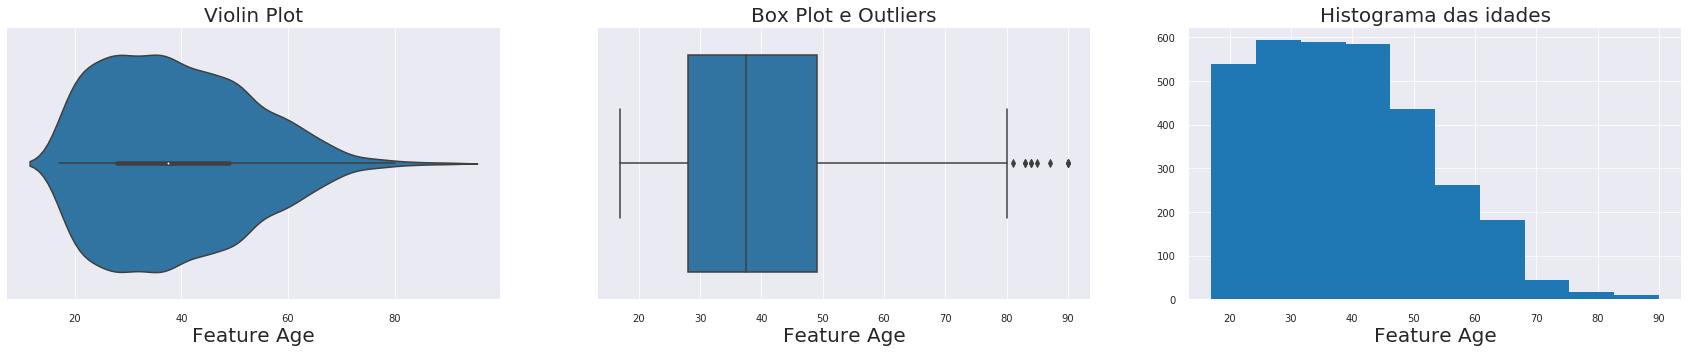

In [28]:
# Visualização da feature Age

# Configuração do estilo e tamanho das imagens
f, ax = plt.subplots(figsize=(30,5))
sns.set_style("darkgrid")

# Violin plot, interessante para saber a concentração dos dados
plt.subplot(131)
sns.violinplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Violin Plot',fontsize=20)

# Boxplot, para visualização dos outliers
plt.subplot(132)
sns.boxplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

# Histograma dos dados
plt.subplot(133)
plt.hist(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Histograma das idades',fontsize=20)

# Talvez tire em breve esse trecho...
sns.despine(offset=10,trim=True)
plt.show()

##### 2.3.2 Análise das features capital-gain e capital-loss

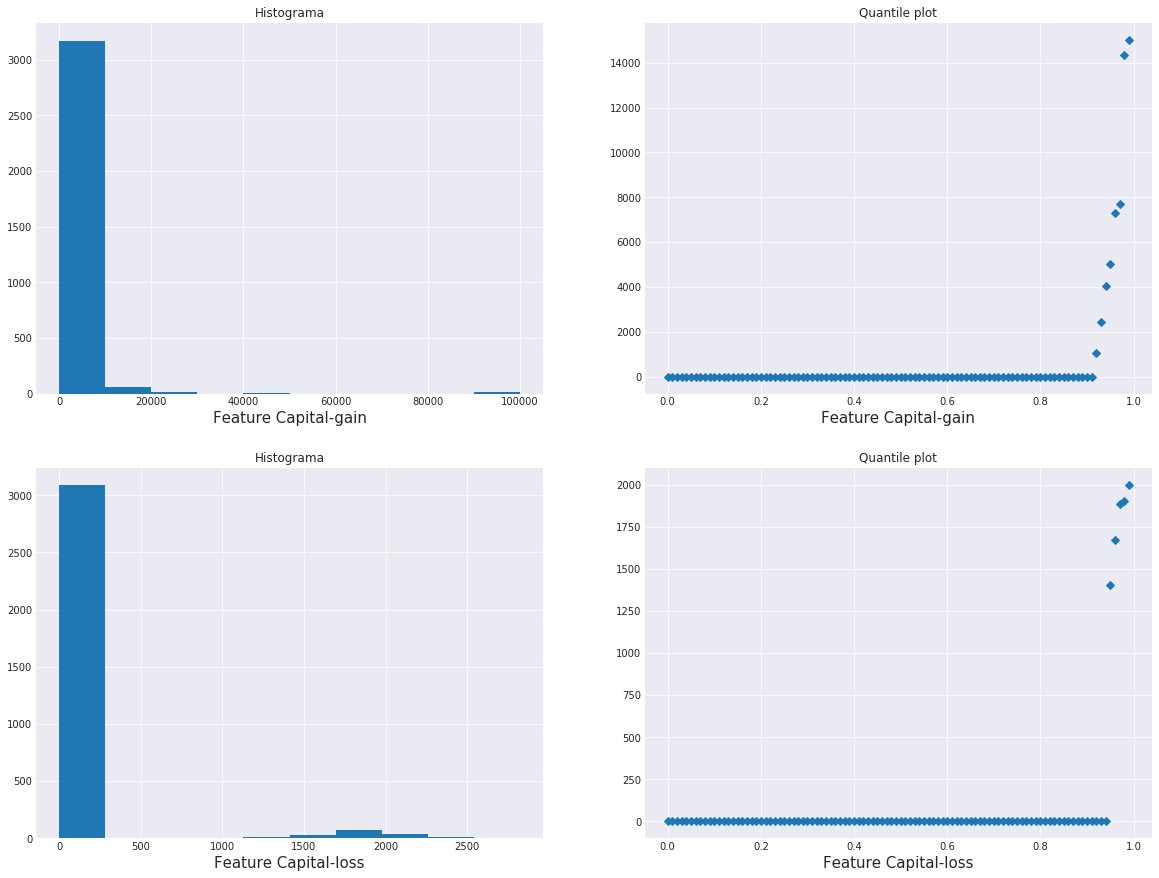

In [29]:
# Feature capital-gain

plt.subplots(figsize=(20,15))

plt.subplot(221)
plt.hist(training_data["capital-gain"])
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Histograma")

# plt.subplot(222)
# sns.boxplot(training_data["capital-gain"])
# plt.xlabel('Feature Capital-gain', fontsize=15)
# plt.title("Box plot")

plt.subplot(222)
mq_capital_gain = stats.mstats.mquantiles(training_data['capital-gain'],np.arange(0,1,0.01))
plt.plot(np.arange(0,1,0.01),mq_capital_gain,'D')
# plt.plot(np.linspace(0,training_data['capital-gain'].values.max(),100), mq_capital_gain, '.')
# stats.probplot(training_data["capital-gain"],plot=plt)
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Quantile plot")

# Feature capital-loss

plt.subplot(223)
plt.hist(training_data["capital-loss"])
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Histograma")

# plt.subplot(224)
# sns.boxplot(training_data["capital-loss"])
# plt.xlabel('Feature Capital-loss', fontsize=15)
# plt.title("Box plot")

plt.subplot(224)
mq_capital_loss = stats.mstats.mquantiles(training_data['capital-loss'],np.arange(0,1,0.01))
plt.plot(np.arange(0,1,0.01),mq_capital_loss,'D')
# plt.plot(np.linspace(0,training_data['capital-loss'].values.max(),100), mq_capital_loss, '.')
# stats.probplot(training_data["capital-loss"],plot=plt)
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Quantile plot")

plt.show()

Aqui, vale ressaltar que a maioria dos valores de capital-gain e capital-loss são iguais a 0 (isso pode ser verificado pelos quantis). Os valores diferentes de 0 são outliers. Como tratar esses casos?

In [30]:
# Checando a relação entre capital-gain e capital-loss

print('Quantidade de registros com capital-gain = 0 e capital-loss = 0: %d' % training_data.loc[(training_data['capital-gain']==0)&(training_data['capital-loss']==0)].shape[0])
print('Quantidade de registros com capital-gain > 0 e capital-loss = 0: %d' % training_data.loc[(training_data['capital-gain']>0)&(training_data['capital-loss']==0)].shape[0])
print('Quantidade de registros com capital-gain = 0 e capital-loss > 0: %d' % training_data.loc[(training_data['capital-gain']==0)&(training_data['capital-loss']>0)].shape[0])
print('Quantidade de registros com capital-gain > 0 e capital-loss > 0: %d' % training_data.loc[(training_data['capital-gain']>0)&(training_data['capital-loss']>0)].shape[0])

Quantidade de registros com capital-gain = 0 e capital-loss = 0: 2820
Quantidade de registros com capital-gain > 0 e capital-loss = 0: 267
Quantidade de registros com capital-gain = 0 e capital-loss > 0: 169
Quantidade de registros com capital-gain > 0 e capital-loss > 0: 0


Pelos resultados acima, é possível ver que ambas as features representam já o ganho (ou a perda) líquida de capital investido, uma vez que não há nenhuma entrada em que capital-gain e capital-loss sejam maiores do que 0. Talvez as duas features possam ser juntadas em uma só (ex: retorno de investimento), com os valores de capital-loss sendo negativos?

In [31]:
# Juntando as variáveis capital-gain e capital-loss em investment-return

for idx in training_data.index.values:
    if (training_data.at[idx,'capital-gain'] == 0) and (training_data.at[idx,'capital-loss'] > 0): # investimento trouxe prejuízo
        training_data.at[idx,'capital-gain'] = -training_data.at[idx,'capital-loss']
        
# Removendo a coluna capital-loss
training_data = training_data.drop(columns=['capital-loss'])

# Renomeando a coluna capital-gain
training_data = training_data.rename(columns={"capital-gain": "investment-return"})


##### 2.3.3 Análise da feature fnlwgt

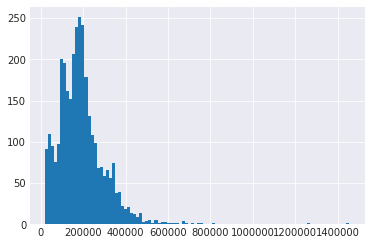

,age,fnlwgt,education-num,is_male,investment-return,hours-per-week,is_from_US
22278,27,177119,10,0,0,44,1
8950,27,216481,13,0,0,40,1
7838,25,256263,12,1,0,40,1
16505,46,147640,3,1,-1902,40,1
19140,45,172822,7,1,-2824,76,1


In [32]:
plt.hist(training_data.fnlwgt, bins=100)
plt.show()
training_data.head()

##### 2.3.4 Análise da feature hours-per-week

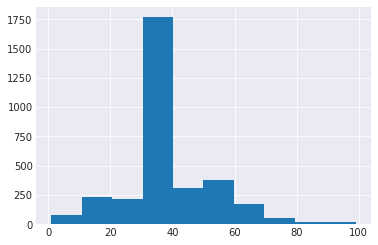

In [33]:
plt.hist(training_data['hours-per-week'])
plt.show()

In [34]:
# Juntando o dataframe das features numéricas com o dataframe das features categóricas

training_data = pd.concat([training_data, training_data_categorical], axis = 1)
training_data.head()


,age,fnlwgt,education-num,is_male,investment-return,hours-per-week,is_from_US,workclass,marital-status,occupation,relationship,race
22278,27,177119,10,0,0,44,1,Private,Once Married,Adm-clerical,Unmarried,White
8950,27,216481,13,0,0,40,1,Private,Never Married,Prof-specialty,Not-in-family,White
7838,25,256263,12,1,0,40,1,Private,Currently Married,Sales,Husband,White
16505,46,147640,3,1,-1902,40,1,Private,Currently Married,Blue-Collar,Husband,Other
19140,45,172822,7,1,-2824,76,1,Private,Once Married,Blue-Collar,Not-in-family,White


/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


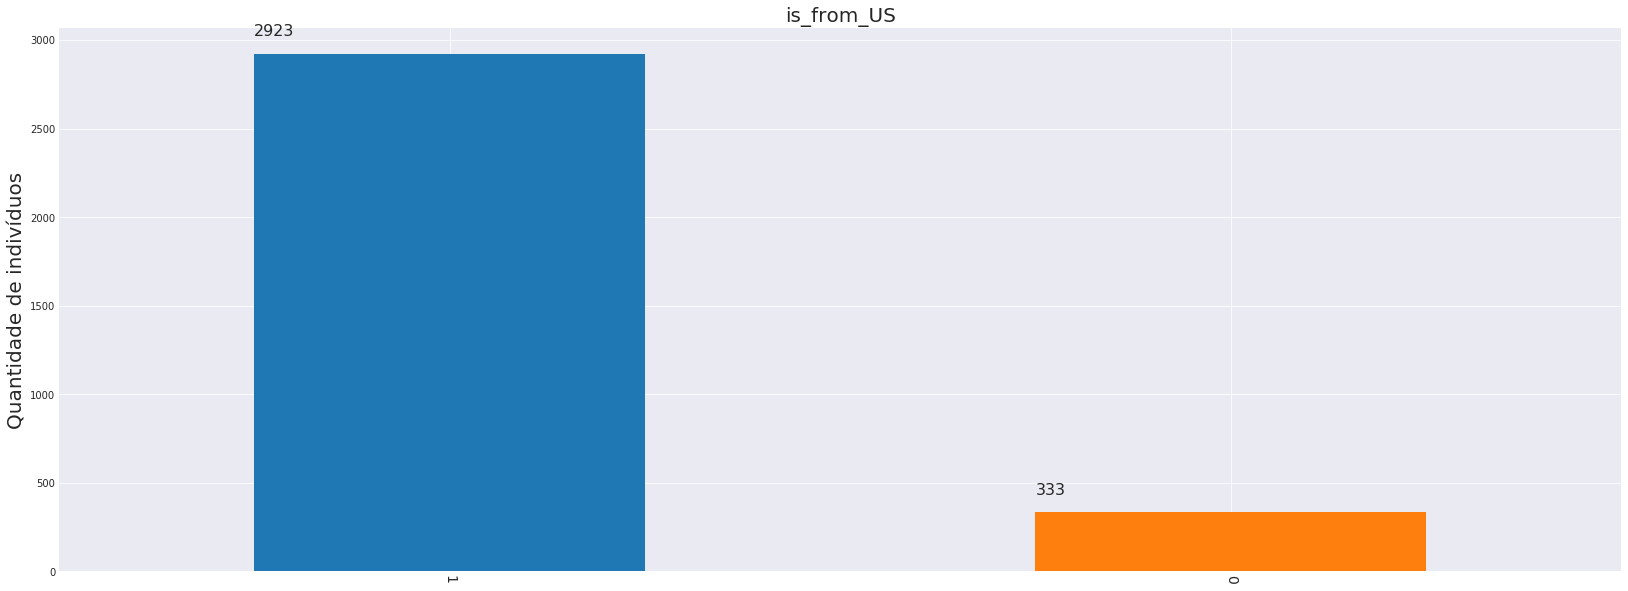

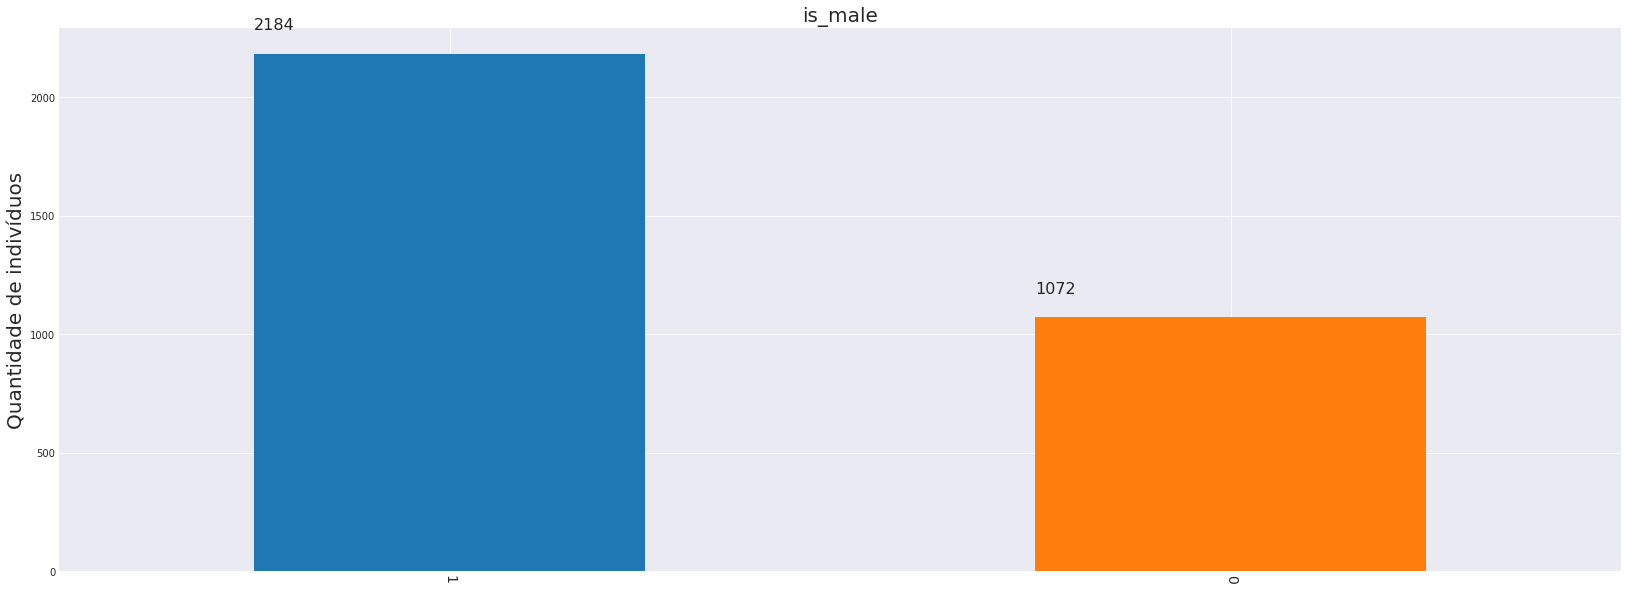

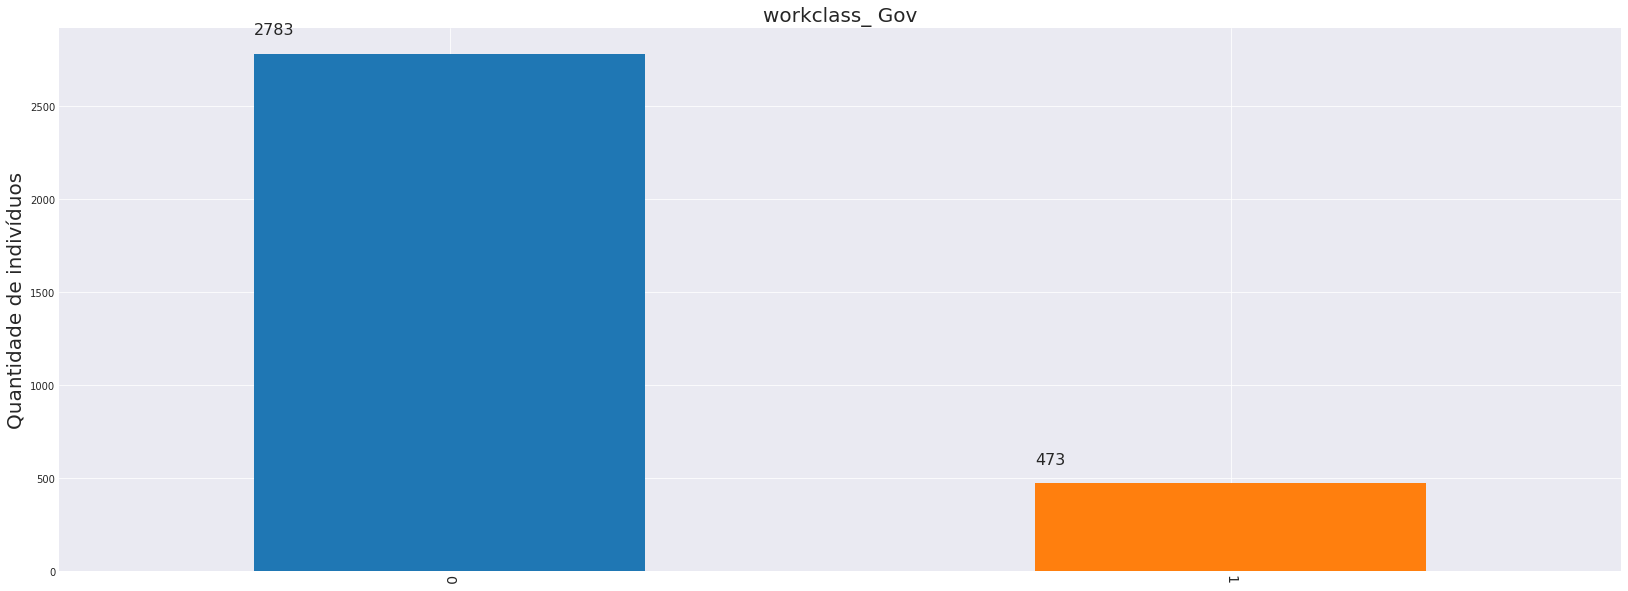

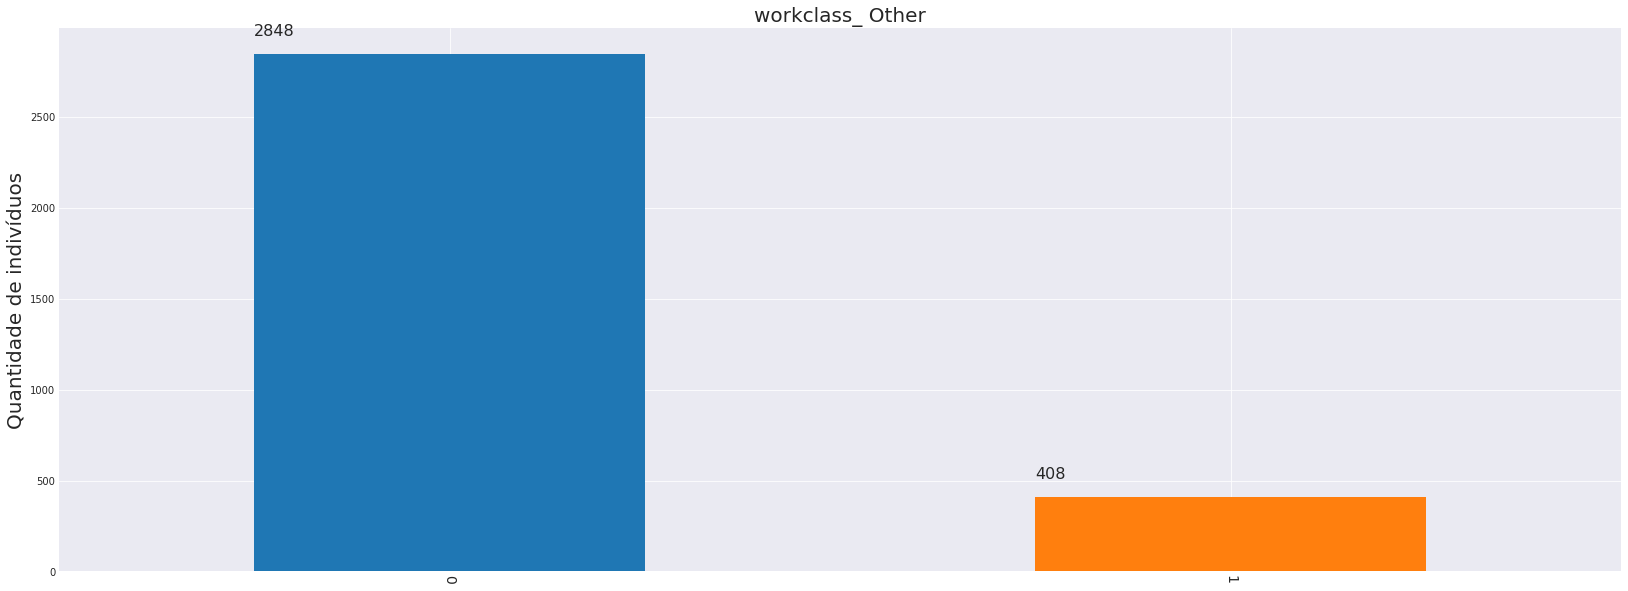

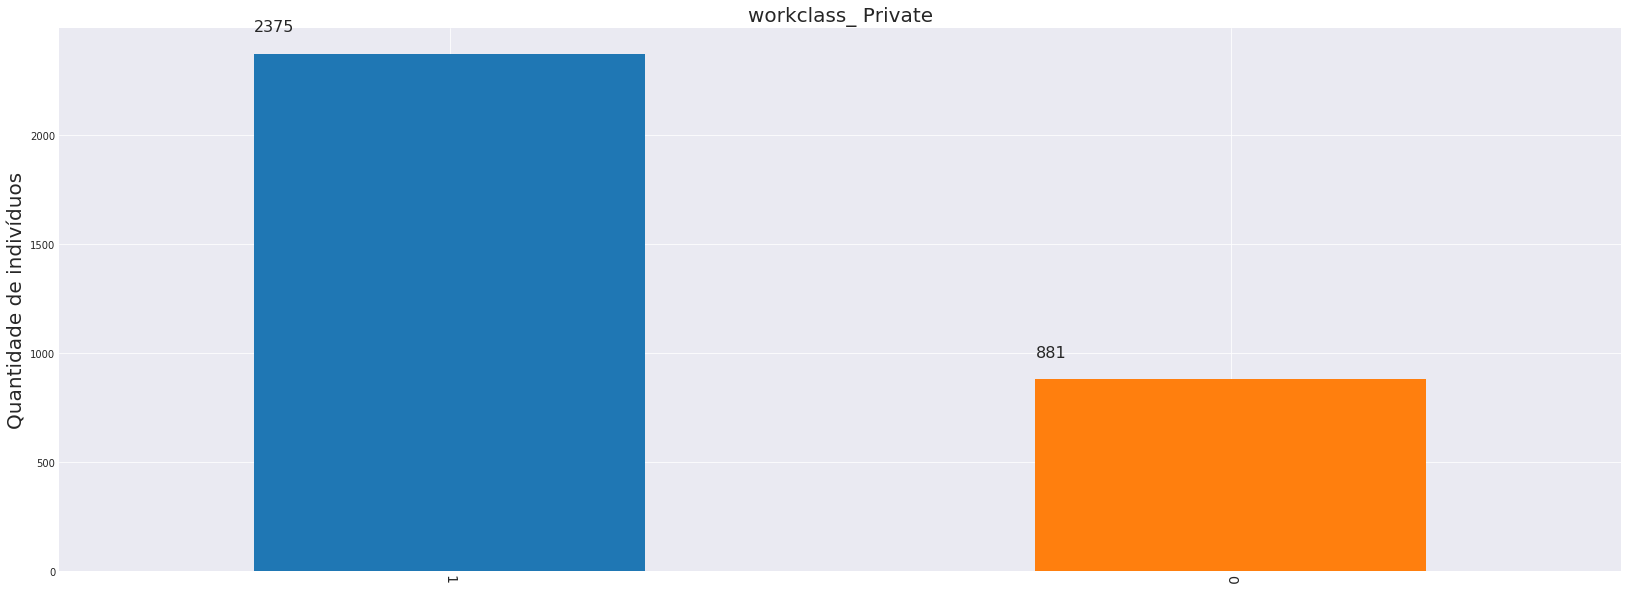

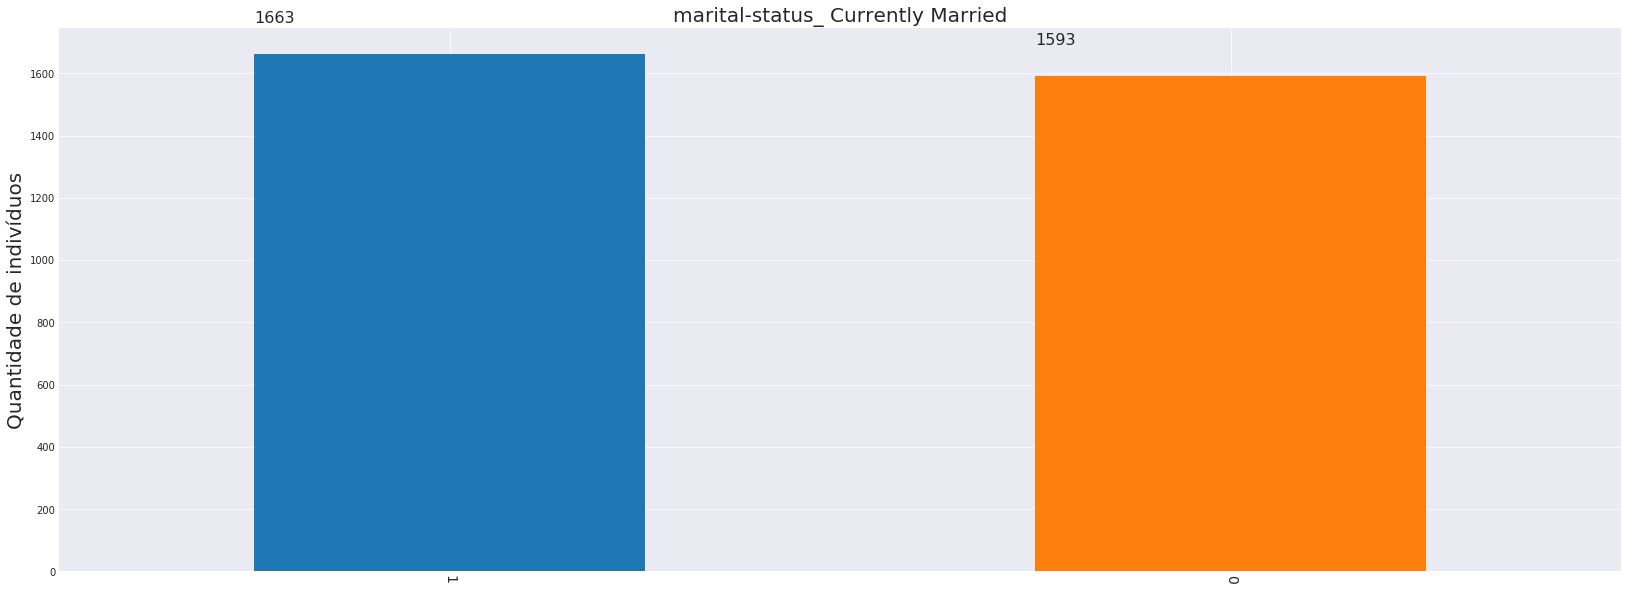

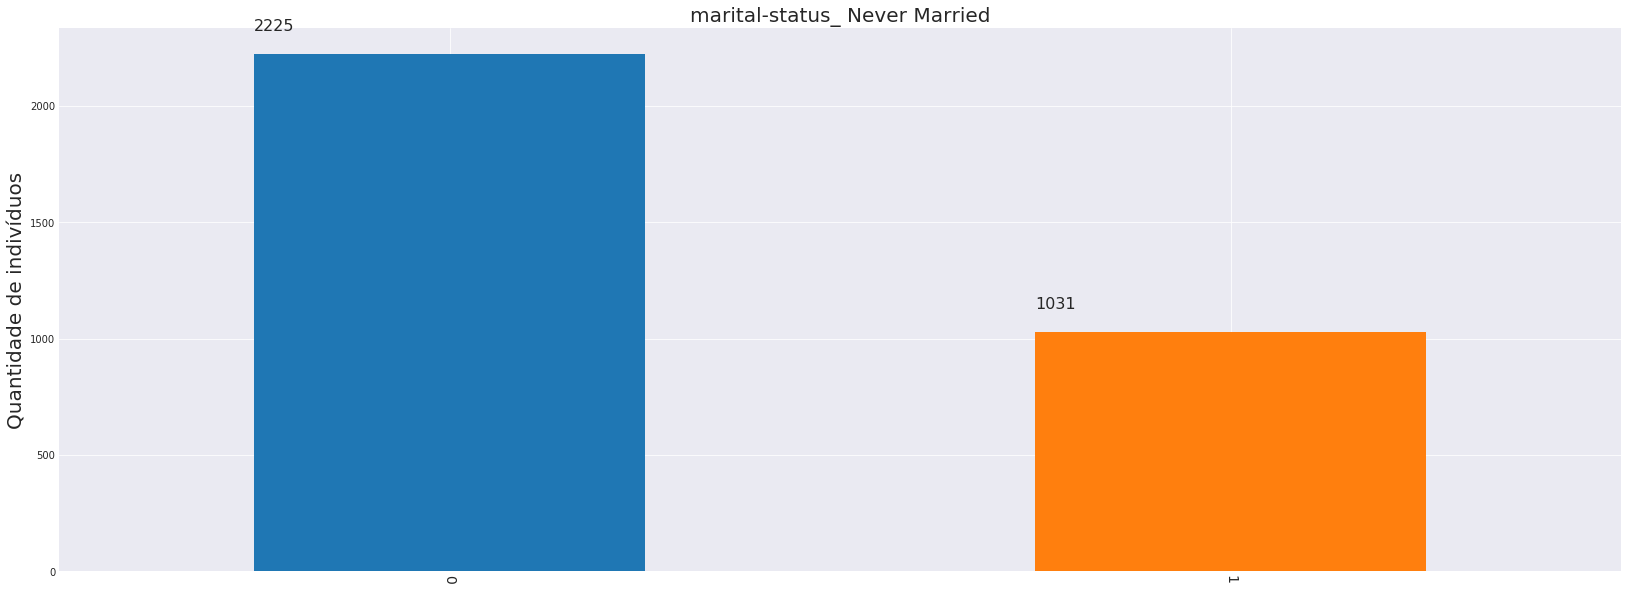

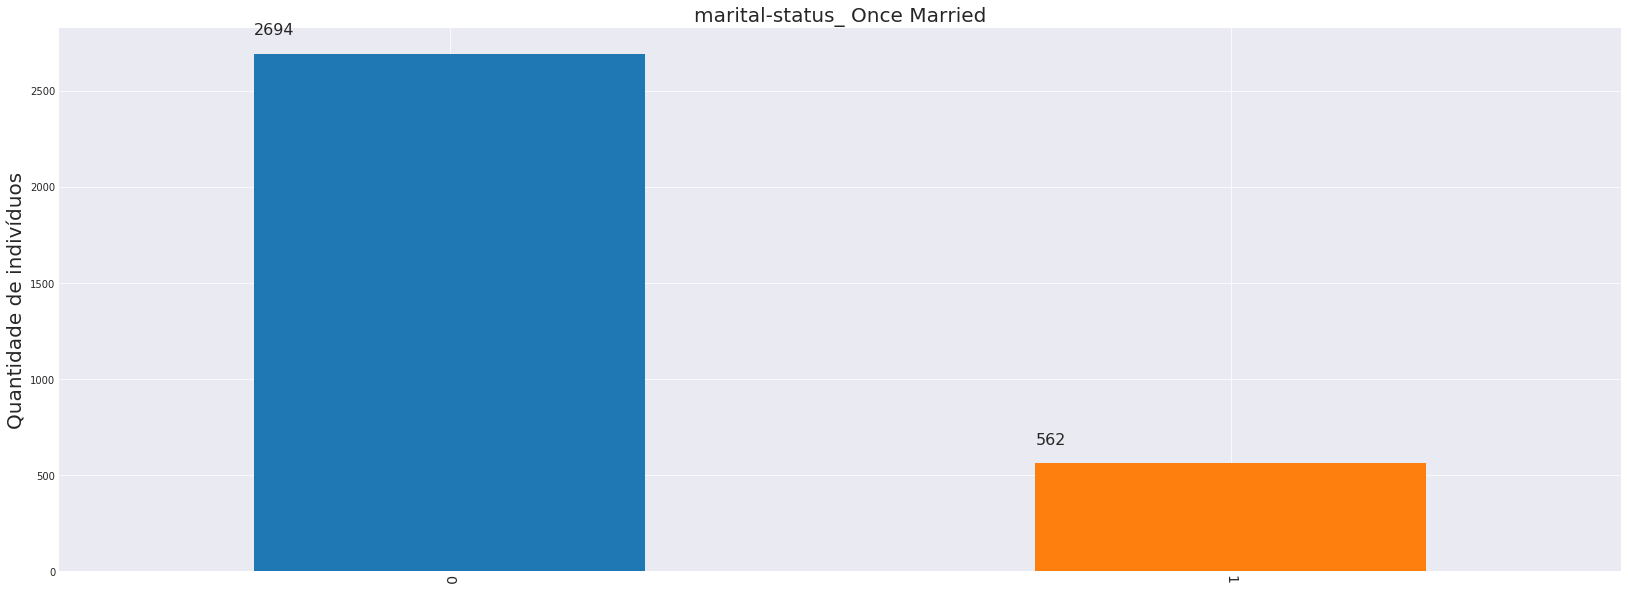

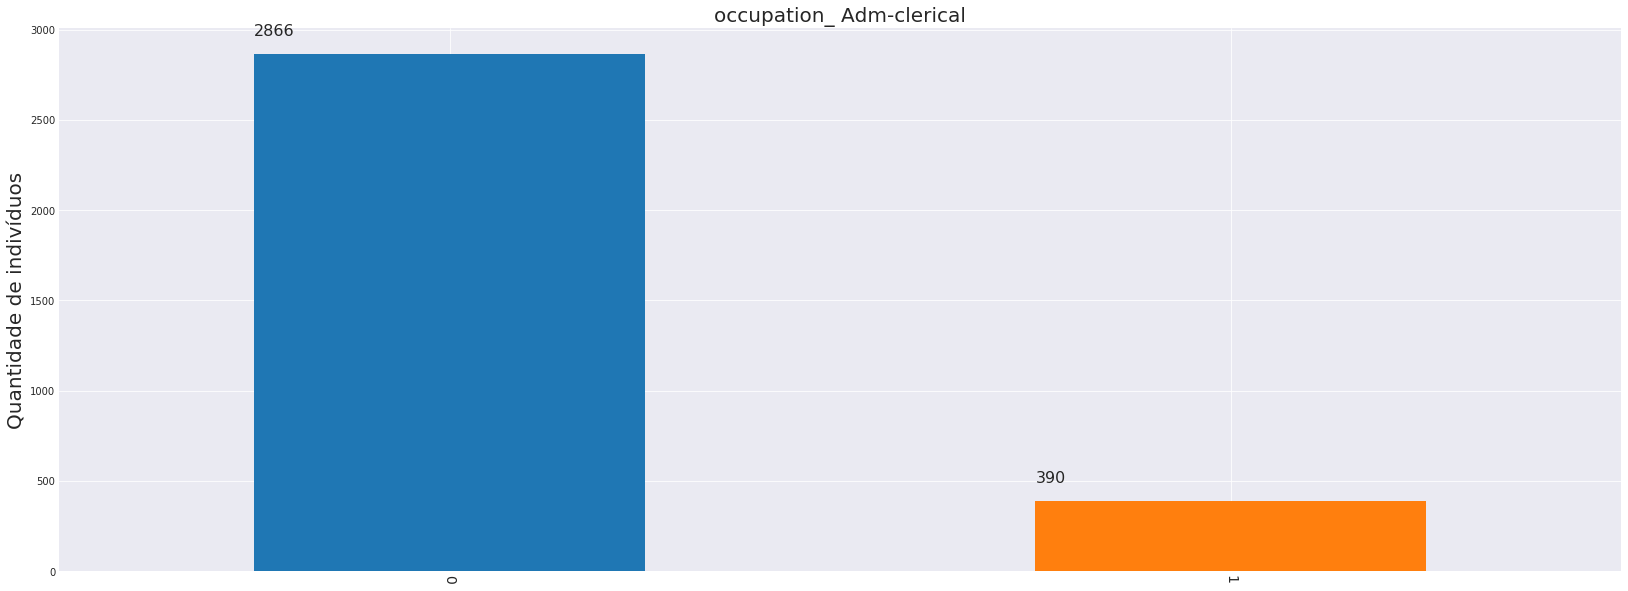

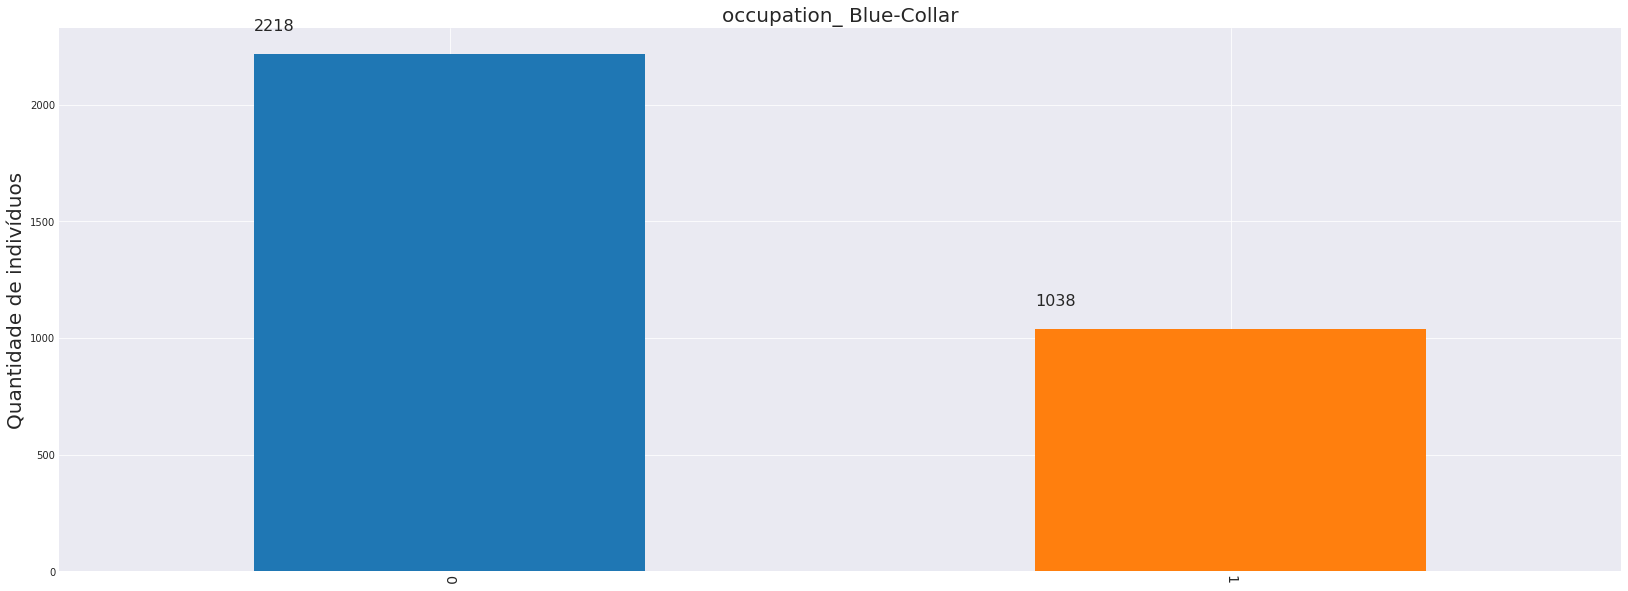

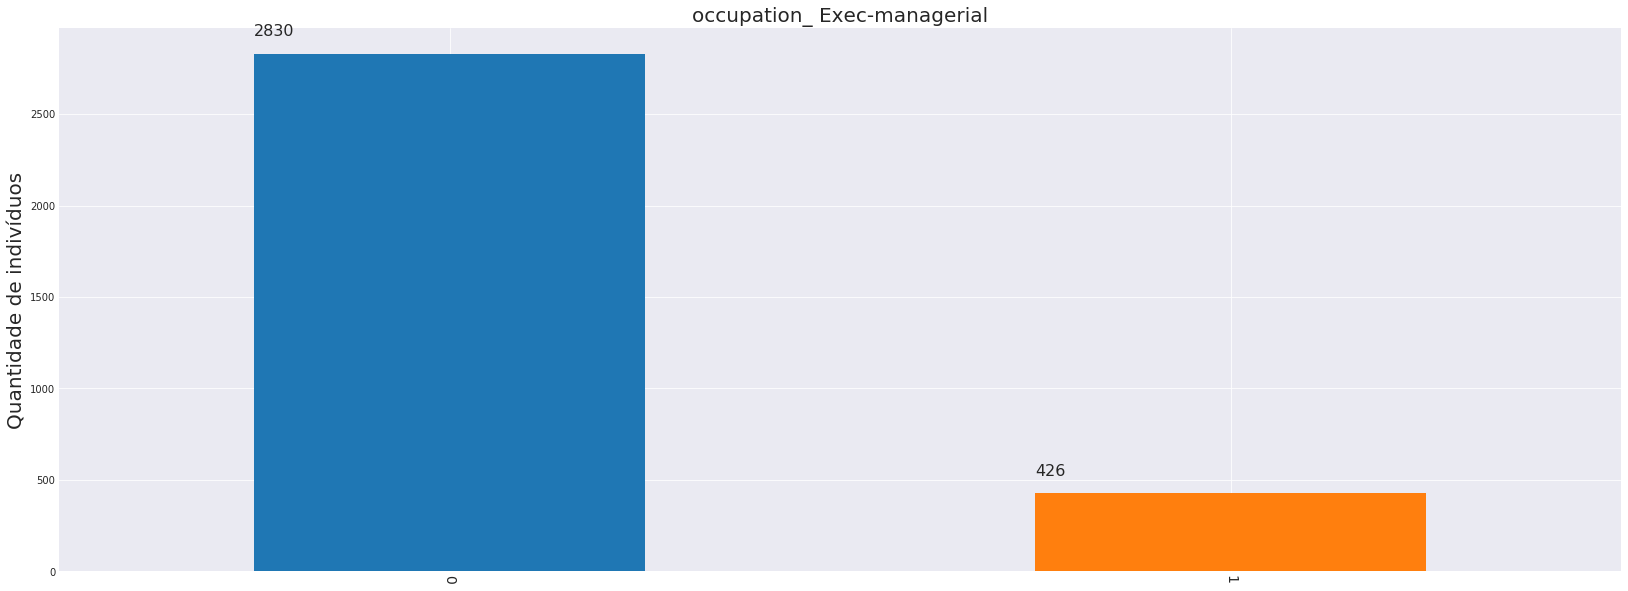

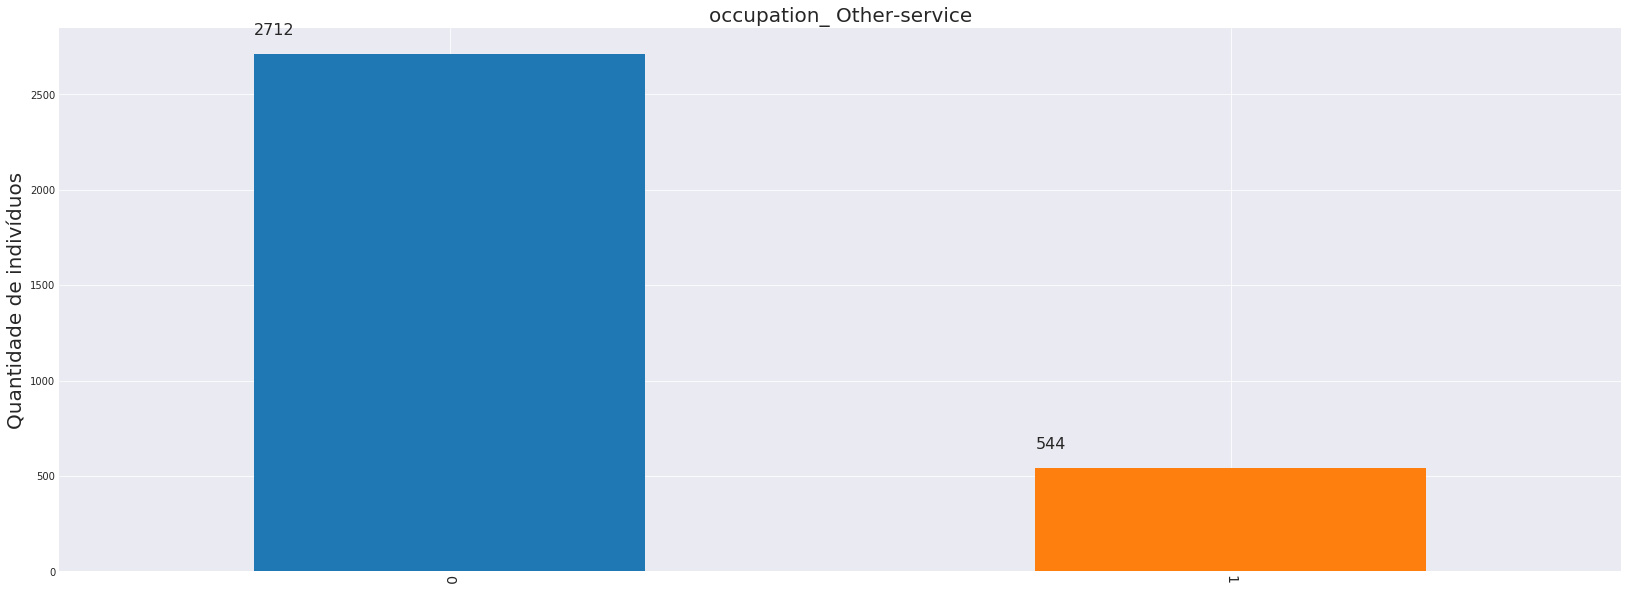

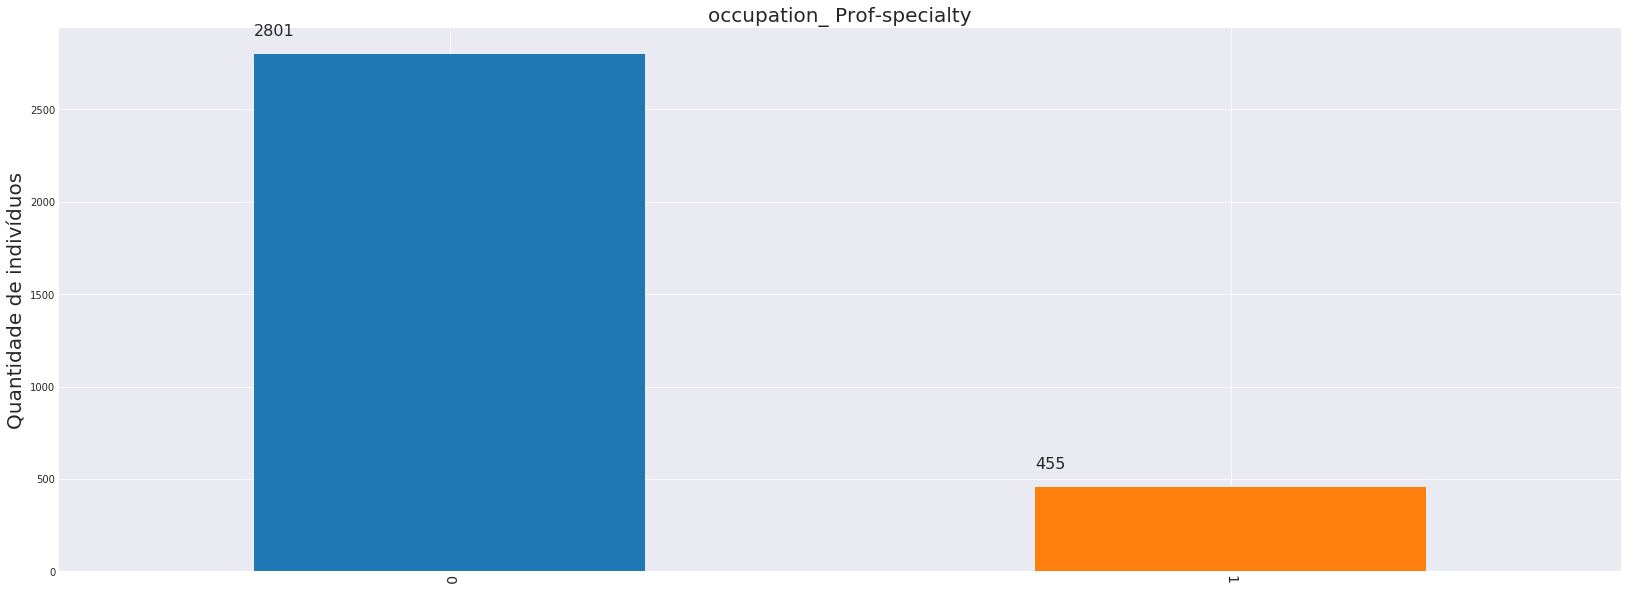

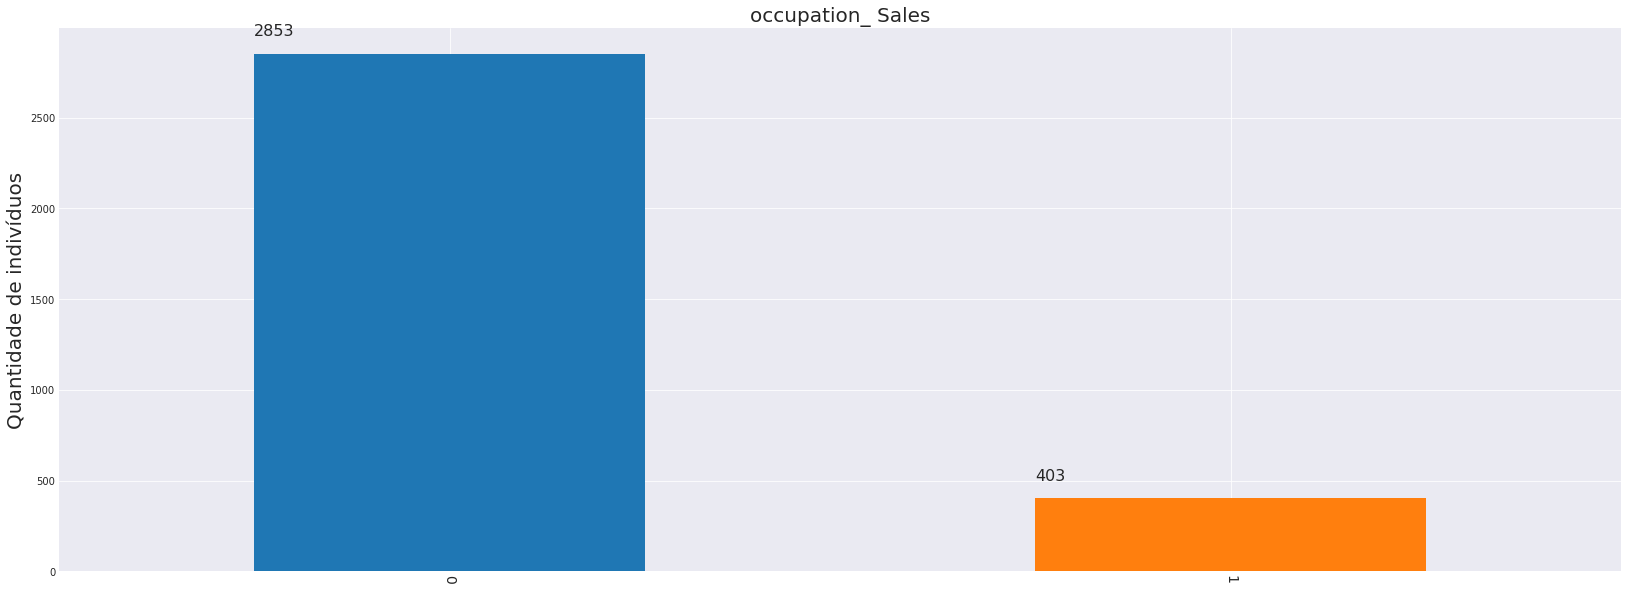

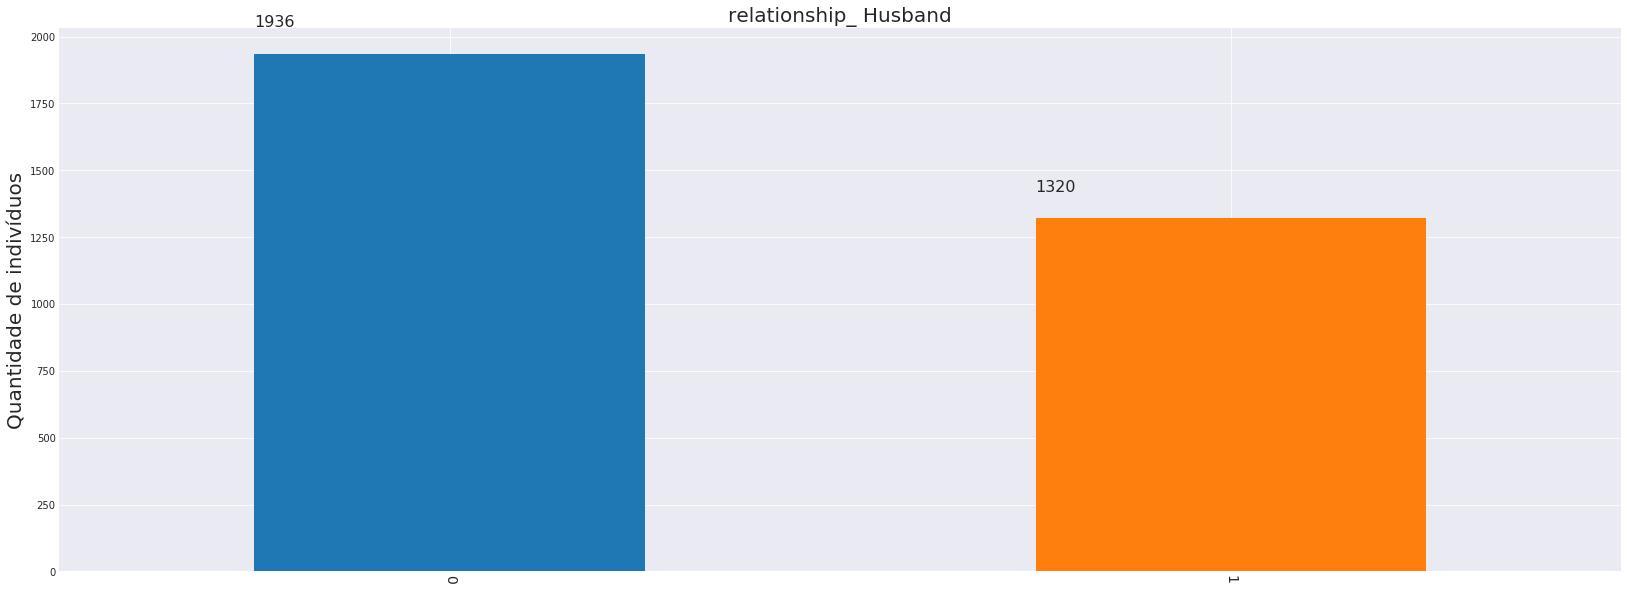

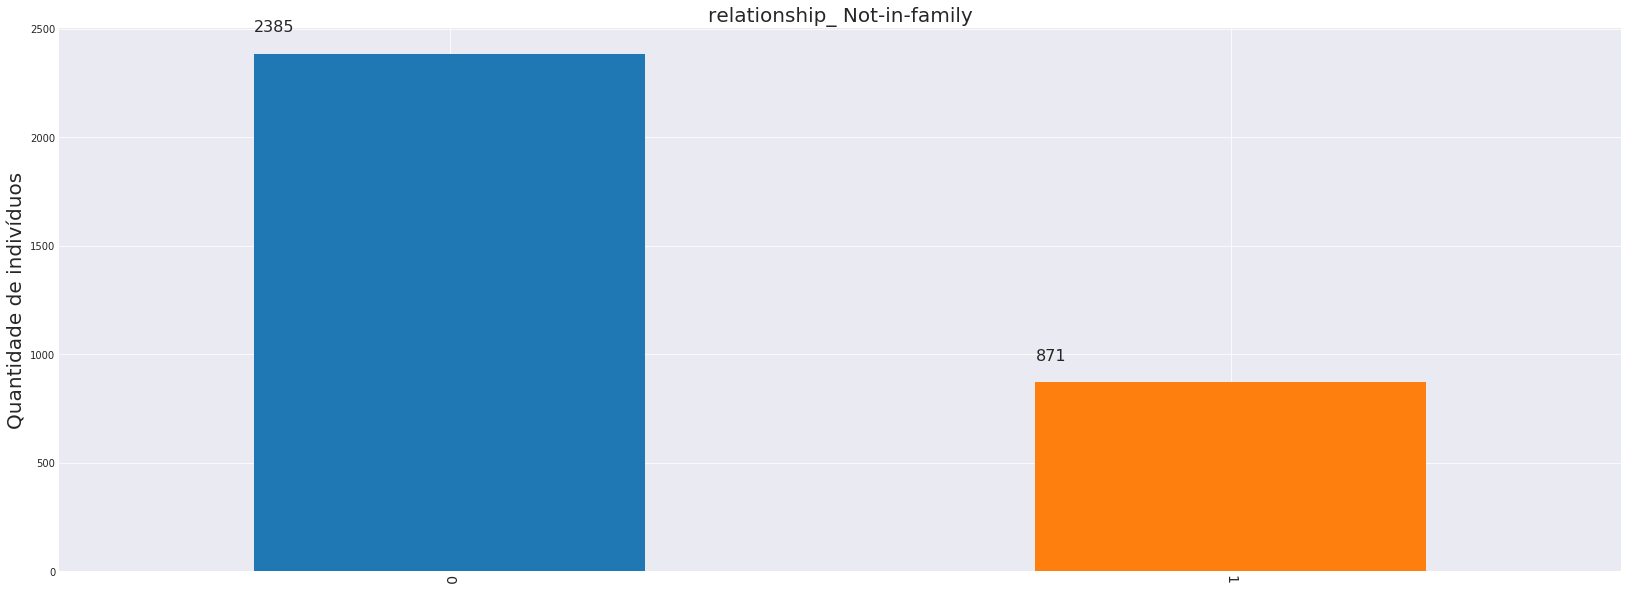

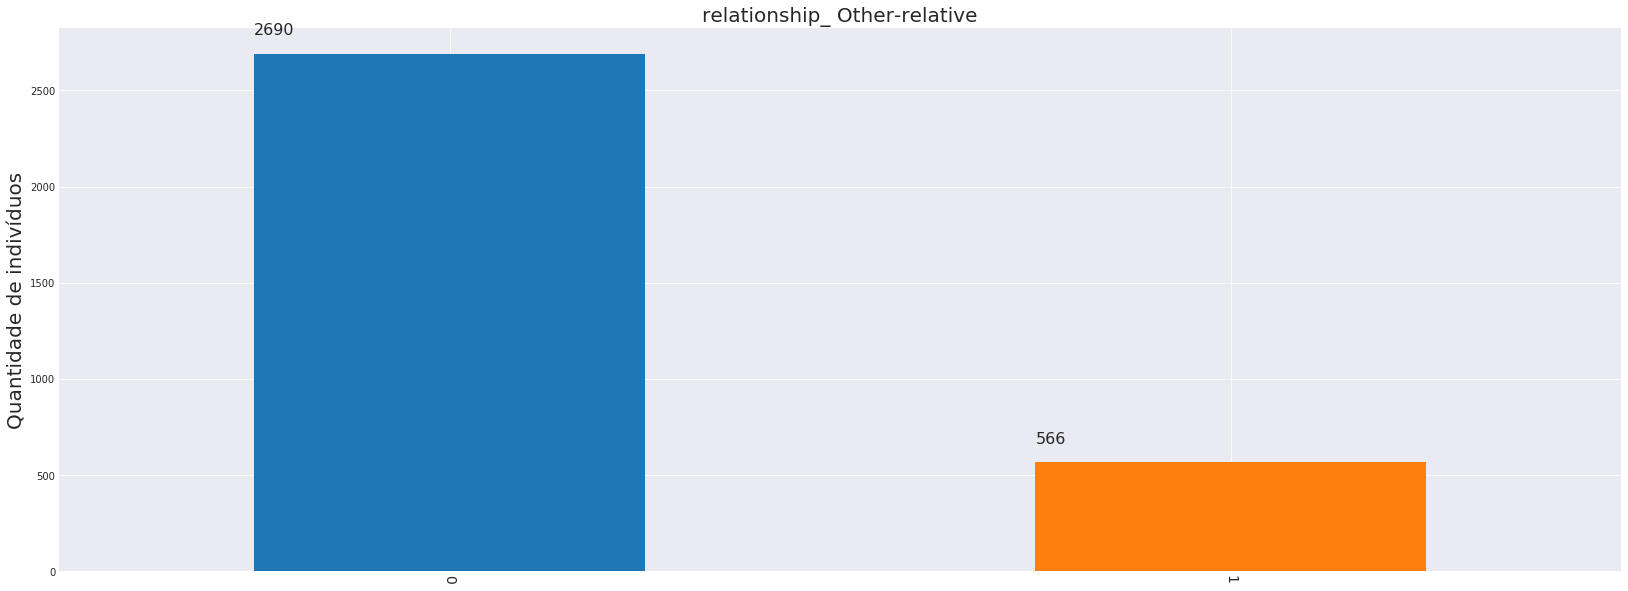

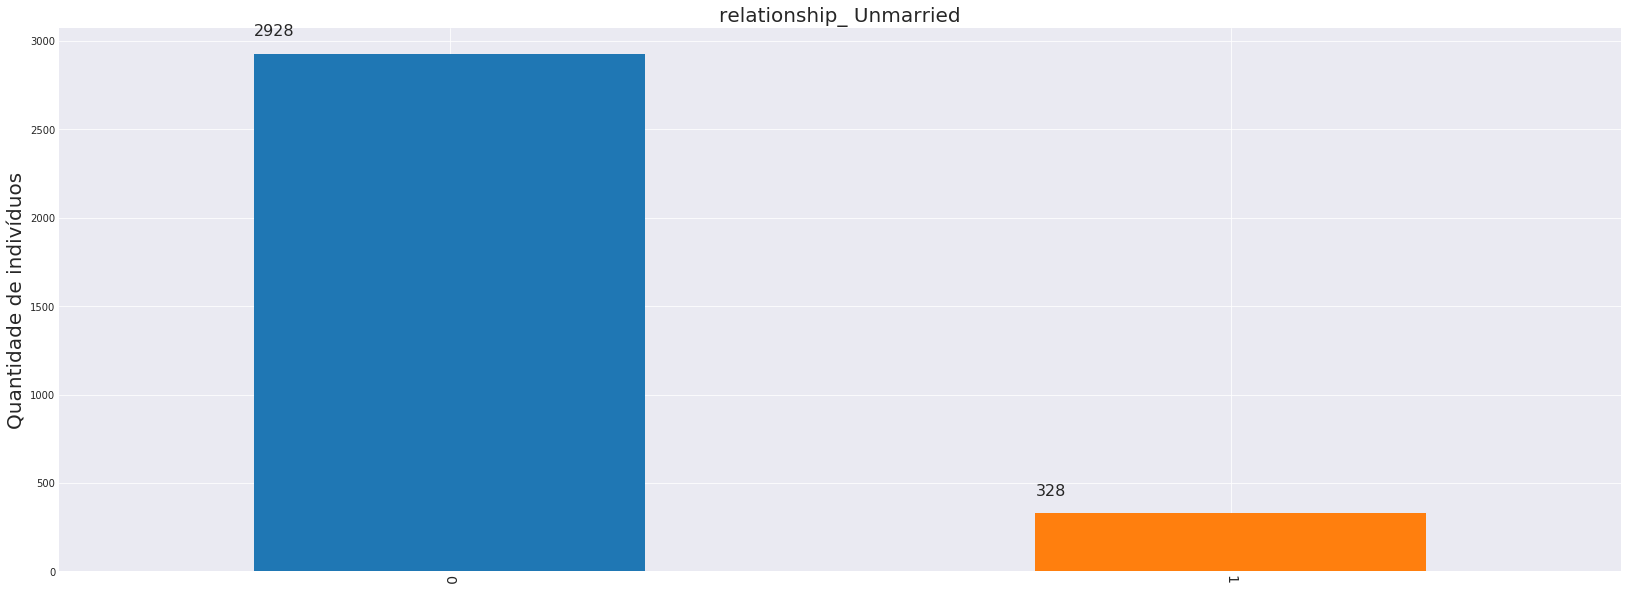

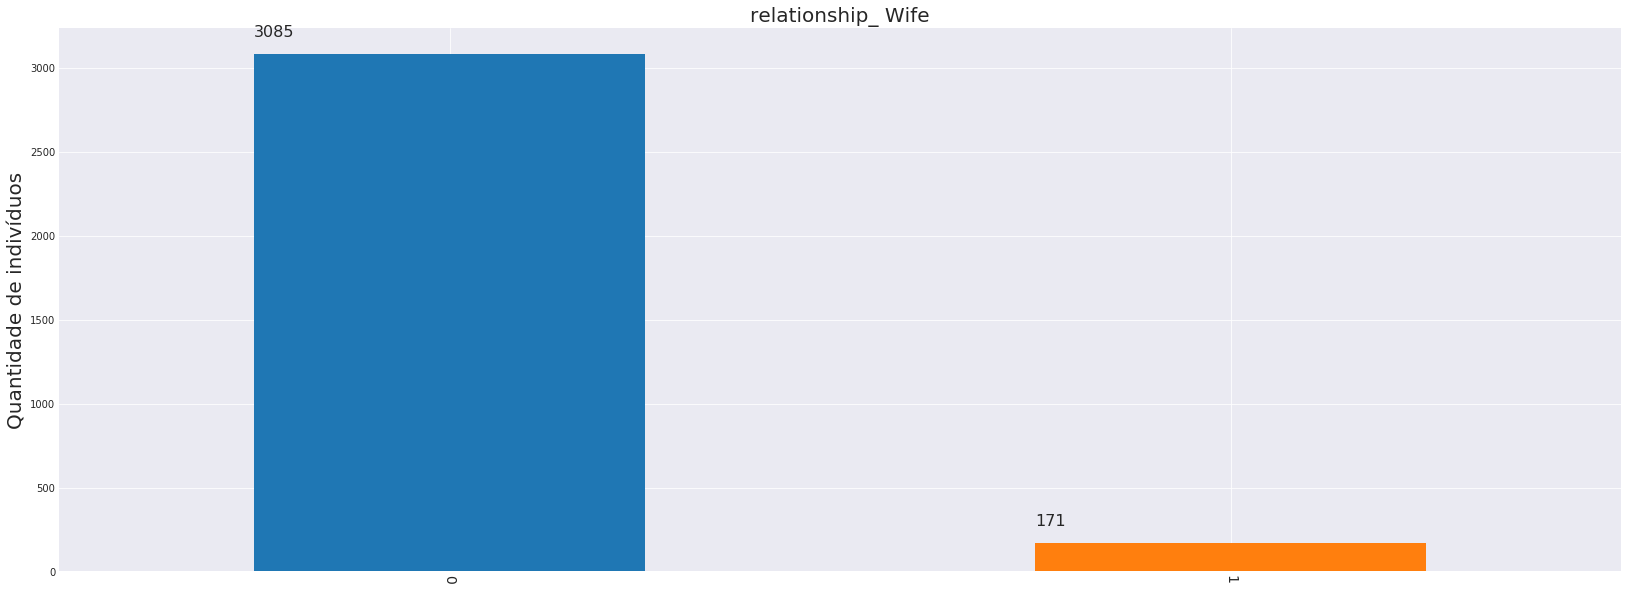

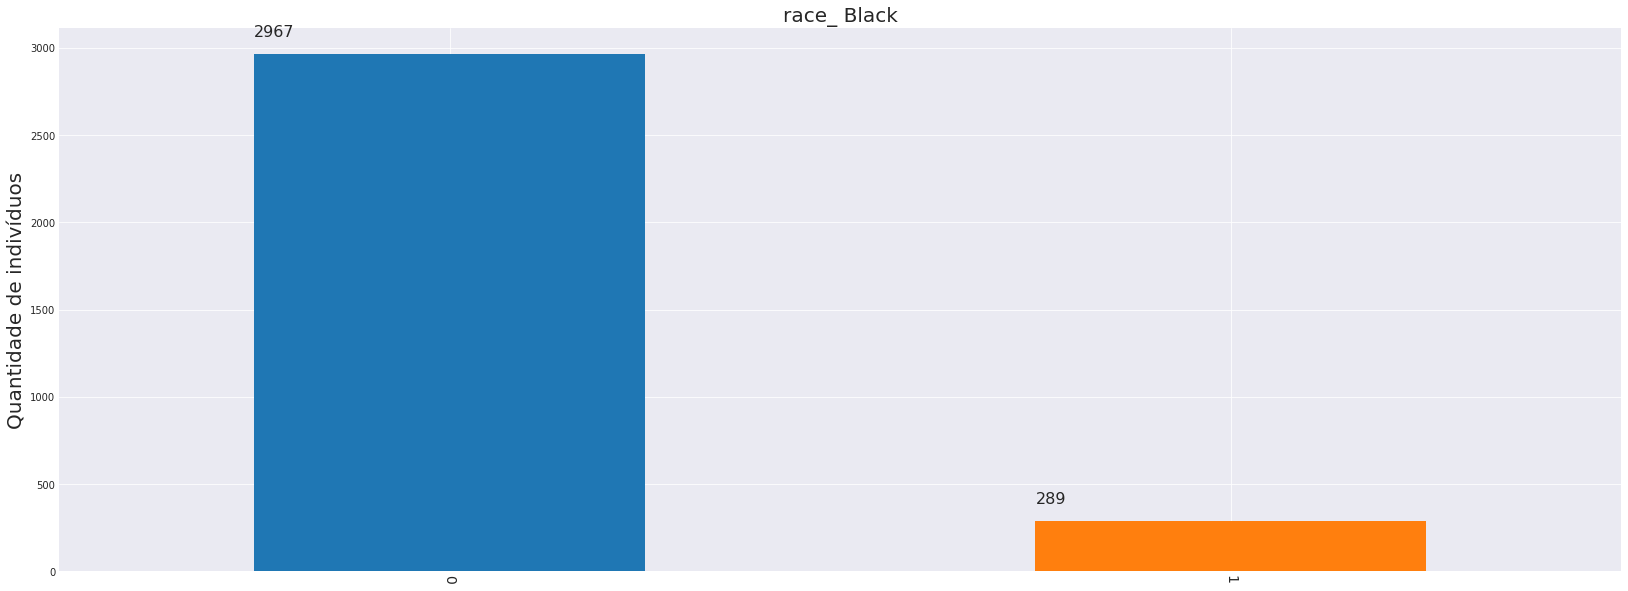

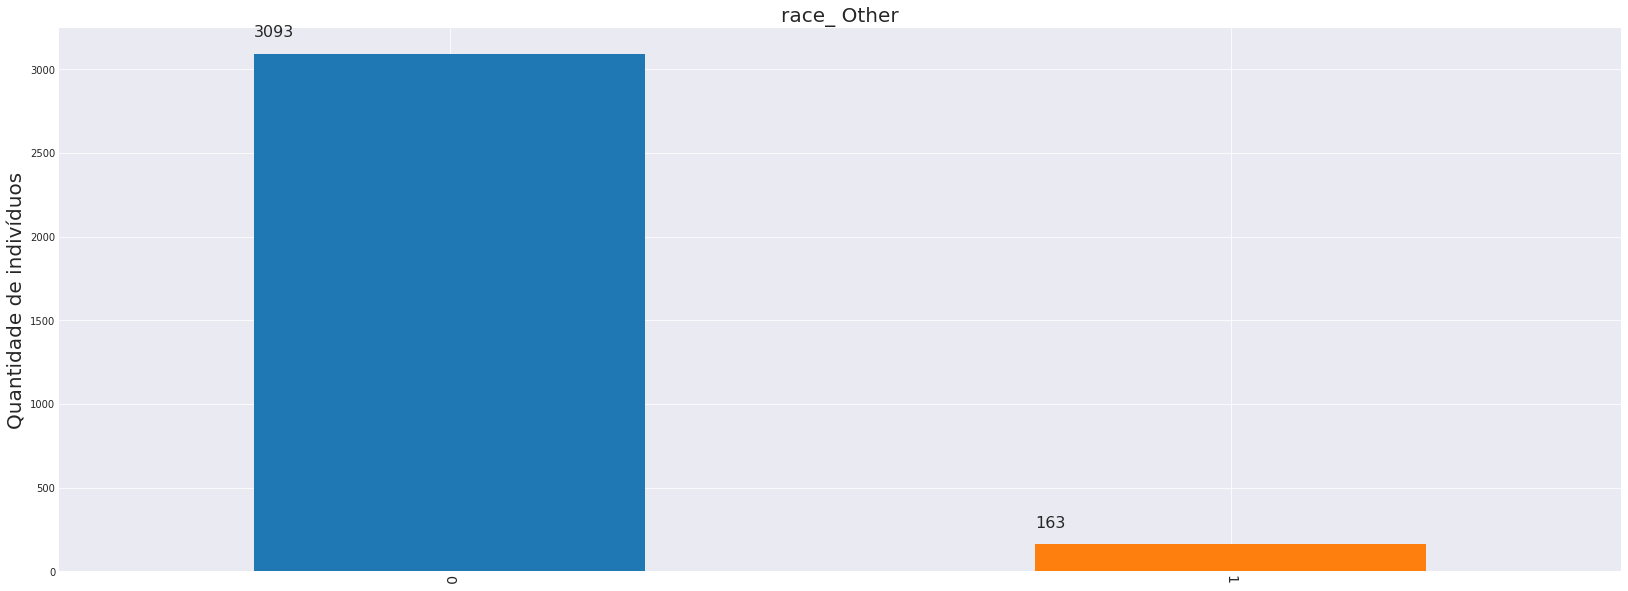

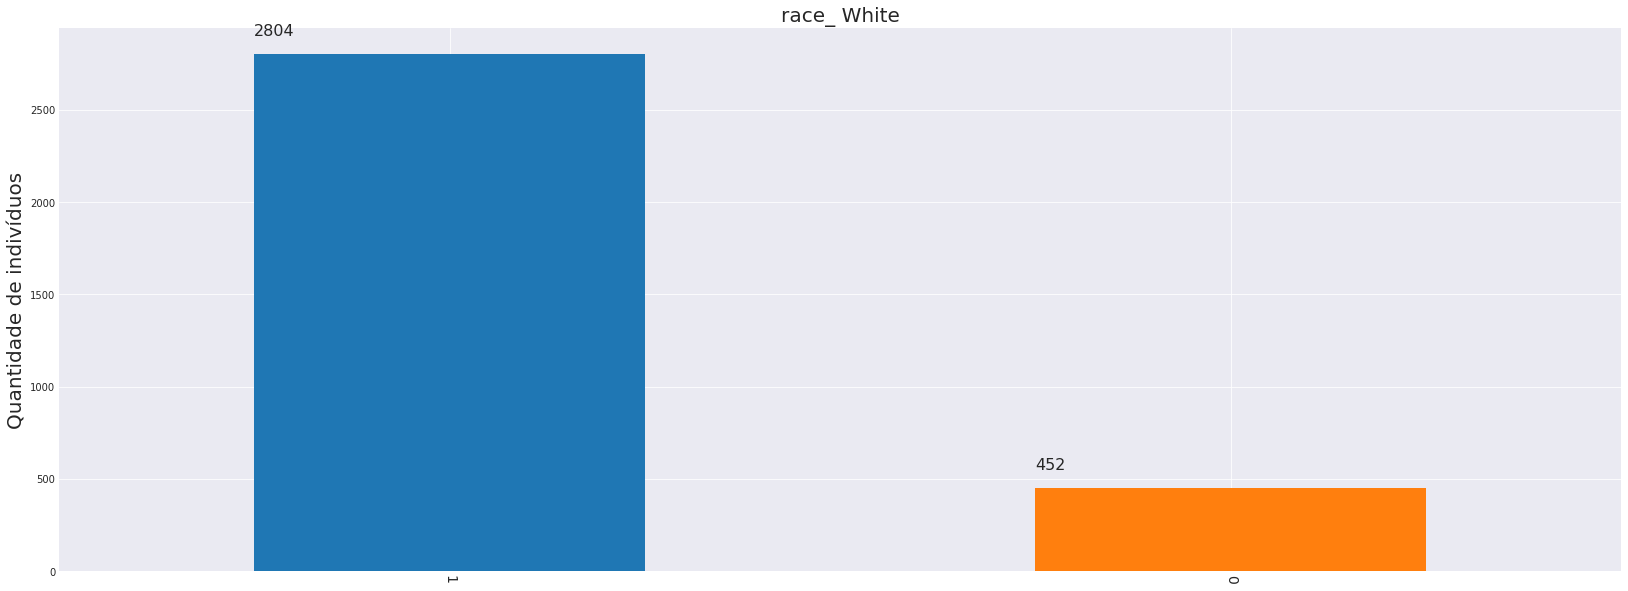

In [35]:
# Expandindo as variáveis categóricas em dummies

index_primeira_feature_categorica = list(training_data.columns).index('workclass')
training_data_categorical_extended = pd.get_dummies(training_data)
training_data_categorical_extended = training_data_categorical_extended.iloc[:,index_primeira_feature_categorica:]

distribuicoes_binarias_simetricas = set()
tol = 0.2 # threshold que define a diferença entre a proporção de indíviduos em cada classe binária que ainda considera a distribuição como simétrica

# Plotando as distribuições das dummies e das features is_from_US e is_male

for feature in ['is_from_US', 'is_male']+list(training_data_categorical_extended.columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    if feature in {'is_from_US', 'is_male'}:
        ax = training_data[feature].value_counts().plot.bar()
        
        # Checando se a distribuição é simétrica - essa informação será utilizada no cálculo da matriz de dissimilaridades posterior
        porcentagens_classes_binarias = training_data[feature].value_counts()/training_data.shape[0]
        if np.abs(porcentagens_classes_binarias[0] - porcentagens_classes_binarias[1]) < tol:
            distribuicoes_binarias_simetricas.add(feature)
    else:
        ax = training_data_categorical_extended[feature].value_counts().plot.bar()
        
        # Checando se a distribuição é simétrica - essa informação será utilizada no cálculo da matriz de dissimilaridades posterior
        porcentagens_classes_binarias = training_data_categorical_extended[feature].value_counts()/training_data_categorical_extended.shape[0]
        if np.abs(porcentagens_classes_binarias[0] - porcentagens_classes_binarias[1]) < tol:
            distribuicoes_binarias_simetricas.add(feature)
    
    ax.set_alpha(0.8)
        
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height() + 100, str(patch.get_height()),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)
        
plt.show()

#### 2.4 Análise de outliers

In [36]:
# De acordo com o gráfico boxplot, existem outliers presentes. Verificando exemplos considerados outliers (acima de 75%)
# Definição dos quantis
Q1, Q3 = training_data.age.quantile(0.25), training_data.age.quantile(0.75)

# Definição de IQR de acordo com a teoria
IQR = Q3 - Q1

outliers = training_data[training_data.age > (Q3 + 1.5 * IQR)]
outliers.head()

,age,fnlwgt,education-num,is_male,investment-return,hours-per-week,is_from_US,workclass,marital-status,occupation,relationship,race
31432,87,90338,9,1,0,2,1,Private,Once Married,Sales,Not-in-family,White
24395,83,153183,13,1,-2392,55,1,Other,Currently Married,Exec-managerial,Husband,White
16302,83,213866,9,1,0,8,1,Other,Once Married,Exec-managerial,Not-in-family,White
4109,90,256514,13,0,991,10,1,Private,Once Married,Blue-Collar,Other-relative,White
15356,90,90523,9,1,0,99,1,Private,Once Married,Blue-Collar,Unmarried,White


In [37]:
# Média de distâncias de cada registro

# valores_registros = training_data_with_dummies.values # array, em que cada elemento corresponde a um array de valores, referentes aos valores de um registro do dataset
# aux = np.empty([valores_registros.shape[0]])

# media_distancias = np.empty([valores_registros.shape[0]])
# matriz_distancias = np.empty(shape=(valores_registros.shape[0], valores_registros.shape[0]))
# idx_media_distancias = 0

# for idx1 in range(valores_registros.shape[0]):
#     for idx2 in range(valores_registros.shape[0]):
#         aux[idx2] = np.sqrt(((valores_registros[idx1]-valores_registros[idx2])**2).sum())  # distância euclidiana do registro a[idx1] para o registro a[idx2]
#         matriz_distancias[idx2,idx1] = aux[idx2]
#     media_distancias[idx_media_distancias] = aux.mean()
#     idx_media_distancias += 1
    
# plt.matshow(matriz_distancias)
# plt.colorbar()
# plt.show()    
    
# plt.plot(np.sort(media_distancias),'x')
# plt.show()

In [84]:
# Definindo o cálculo da matriz de dissimilaridades entre registros

def calcularMatrizDissimilaridade(dataframe, nome_features_numericas, nome_features_ordinais, nome_features_categoricas_extendidas_em_dummy):
    
    '''Essa função assume que as features_categoricas estão expandidas em variáveis dummy, 
    ou seja, correspondem a features binárias. Além disso, ela também assume que não há
    valores faltantes no dataset
    
    Referência: Jiawei Han. 2005. Data Mining: Concepts and Techniques. Morgan Kaufmann Publishers Inc., 
    San Francisco, CA, USA, Cap.2, pp 75-76.'''
    
    D = np.zeros([dataframe.shape[0], dataframe.shape[0]])
    
#     idx_col_D = 0
#     reg1 = dataframe.index.values[0:2]
    aux = list(dataframe.index.values)
    for idx_col_D, reg1 in enumerate(dataframe.index.values):
        aux.pop(0)
        for idx_lin_D, reg2 in enumerate(aux,idx_col_D+1):
            pesos_delta = np.ones([dataframe.shape[1]])
            d = np.empty([dataframe.shape[1]])
            for idx, col in enumerate(dataframe.columns):
                if col in nome_features_numericas:
                    d[idx] = np.abs((dataframe.at[reg1,col] - dataframe.at[reg2,col]))/(dataframe[col].max() - dataframe[col].min())
                elif col in nome_features_ordinais:
                    numero_categorias = len(dataframe[col].unique())
                    z1 = (dataframe.at[reg1,col] - 1)/(numero_categorias - 1)
                    z2 = (dataframe.at[reg2,col] - 1)/(numero_categorias - 1)
                    d[idx] = np.abs(z1-z2) # Não precisa normalizar, pois os valores de z encontram-se entre [0,1]
                elif col in nome_features_categoricas_extendidas_em_dummy:
                    d[idx] = 0 if (dataframe.at[reg1,col]==dataframe.at[reg2,col]) else 1
                    if (col not in distribuicoes_binarias_simetricas) and (dataframe.at[reg1,col]==dataframe.at[reg2,col]):
                        pesos_delta[idx] = 0
            
            D[idx_lin_D,idx_col_D] = sum(pesos_delta*np.transpose(d))/sum(pesos_delta)
            
    return D

In [ ]:
# Calculando a matriz de dissimilaridades

training_data_extended = pd.get_dummies(training_data)
nome_features_categoricas = {'is_from_US', 'is_male'}.union(set(training_data_categorical_extended.columns))
nome_features_ordinais = {'education-num'}
nome_features_numericas = set(training_data_extended.columns)-nome_features_categoricas.union(nome_features_ordinais)

D = calcularMatrizDissimilaridade(training_data_extended, nome_features_numericas, nome_features_ordinais, nome_features_categoricas)

In [78]:
D[:,0:2]

array([[0.        , 0.        ],
       [0.48217113, 0.        ],
       [0.60472134, 0.59348039],
       ...,
       [0.51293415, 0.52391543],
       [0.6229894 , 0.54857176],
       [0.69107172, 0.67774372]])

In [39]:
# Um pouco mais sobre os outliers:
outliers.describe()

,age,fnlwgt,education-num,is_male,investment-return,hours-per-week,is_from_US
count,10.000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,85.700,185237.600000,10.500000,0.900000,-140.100000,31.90000,0.900000
std,3.335,89587.518651,3.064129,0.316228,850.324441,30.80927,0.316228
min,81.000,90338.000000,4.000000,0.000000,-2392.000000,2.00000,0.000000
25%,83.250,124818.750000,9.000000,1.000000,0.000000,10.00000,1.000000
50%,84.500,171403.000000,10.500000,1.000000,0.000000,20.00000,1.000000
75%,89.250,210749.000000,13.000000,1.000000,0.000000,50.00000,1.000000
max,90.000,388384.000000,14.000000,1.000000,991.000000,99.00000,1.000000


In [40]:
# Quantos outliers?
print('Quantidade de outliers: {}\nPorcentagem de outliers em relação aos dados:{:.4f}%'.format(outliers.shape[0],(outliers.shape[0]/training_data.shape[0])*100))

Quantidade de outliers: 10
Porcentagem de outliers em relação aos dados:0.3071%


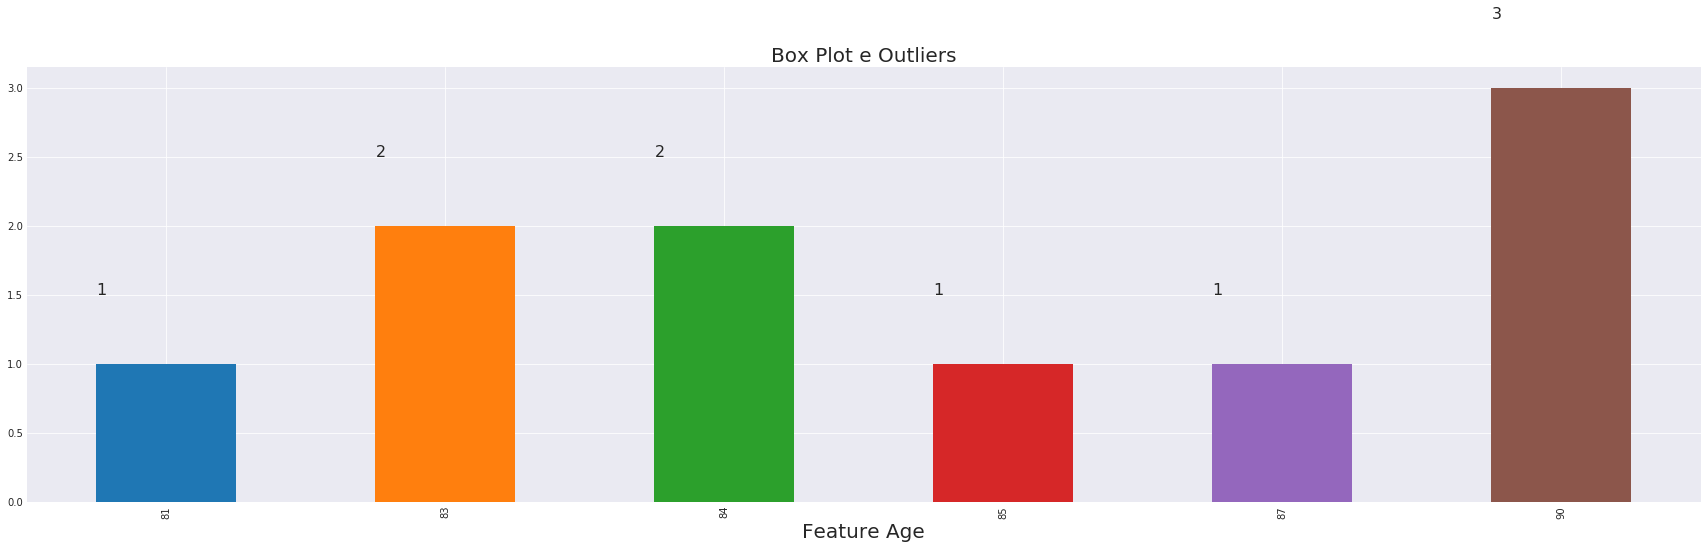

In [41]:
# Histograma dos outliers
plt.figure(figsize=(30,8))
sns.set_style("darkgrid")

# BoxPlot
ax = outliers.age.value_counts().sort_index().plot.bar()
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height() + 0.5, str(patch.get_height()),fontsize=16)
    
plt.show()

##### Qual a relação entre age e earnings?

In [42]:
# Histogramas de idade e ganhos

# Convertendo as labels "<=50k" e ">50k" para -1 e 1, respectivamente
labels, idx = pd.factorize(training_data.earnings)
labels[labels==0] = -1
labels[labels==1] = 1

# Nova coluna que representa as classes em -1 e 1

training_data_discretized_earnings = training_data
training_data_discretized_earnings['earnings-num'] = labels

training_data_class1 = training_data.loc[training_data_discretized_earnings['earnings-num']==-1]
training_data_class2 = training_data.loc[training_data_discretized_earnings['earnings-num']==1]

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(training_data_class1.age)
plt.xlabel('Idade')
plt.title('Histograma de idades para classe 1 (ganhos <=50k)')

plt.subplot(122)
plt.hist(training_data_class2.age)
plt.xlabel('Idade')
plt.title('Histograma de idades para classe 2 (ganhos > 50k)')

plt.show()

# Piechart para ocupações profissionais e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1.occupation.value_counts().plot.pie()
plt.title('Piechart de ocupações para classe 1 (ganhos <= 50k)')

plt.subplot(122)
training_data_class2.occupation.value_counts().plot.pie()
plt.title('Piechart de ocupações para classe 2 (ganhos > 50k)')

plt.show()

# Piechart para estado civil e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1['marital-status'].value_counts().plot.pie()
plt.title('Piechart de estado civil para classe 1 (ganhos <= 50k)')

plt.subplot(122)
training_data_class2['marital-status'].value_counts().plot.pie()
plt.title('Piechart de estado civil para classe 2 (ganhos > 50k)')

plt.show()

# Barplot para níveis de educação e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
training_data_class1.education.value_counts().plot.bar()
plt.xlabel('Nível de educação')
plt.title('Barplot de níveis de educação para a classe 1 (ganhos <=50k)')

plt.subplot(122)
training_data_class2.education.value_counts().plot.bar()
plt.xlabel('Nível de educação')
plt.title('Barplot de níveis de educação para a classe 2 (ganhos > 50k)')

plt.show()

# Histogrma para horas-por-semana e ganhos

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(training_data_class1['hours-per-week'])
plt.xlabel('Horas por semana')
plt.title('Histograma de horas trabalhadas por semana para a classe 1 (ganhos <=50k)')

plt.subplot(122)
plt.hist(training_data_class2['hours-per-week'])
plt.xlabel('Hras por semana')
plt.title('Histograma de horas trabalhadas por semana para a classe 2 (ganhos > 50k)')

plt.show()


AttributeError: 'DataFrame' object has no attribute 'earnings'

## 3. Pré-processamento dos dados

#### Transformação dos targets em -1 e +1

In [ ]:
# Transformação do target: utilização de -1 para ganhos menores que 50K/Year, +1 para ganhos maiores de 50K/year
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

#### Separação do dataset

In [ ]:
# Separação do dataset em treino e teste
from sklearn.model_selection import train_test_split

## 4. Treinamento dos modelos

### 4.1 Árvores binárias de decisão

### 4.2 Random Forests

### 4.3 Redes Neurais

### 4.4 Naive Bayes

### 4.5 SVM

## 5. Resultados

Anotações:

- Verificar a relação entre outliers(idade) e desfecho (<50K). Parece que idosos ganham menos que 50K
- 


## 6. Referências Bibliográficas

[1] (Online) UCI Machine Learning Repository: Census Income Dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/Census+Income. Último acesso: 21/03/2018 às 00:22 horas.

[2] (Online) UCI Machine Learning Repository: Census Income KDD. Disponível em https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD). Último acesso: 21/03/2018 às 01:30 horas.

[3] (Online) Classifying Income data from Census 1994 Data. Disponível em https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf. Último acesso: 21/03/2018 às 01:32 horas.

[4] Ristanoski, Goce & Liu, Wei & Bailey, James. (2013). Discrimination aware classification for imbalanced datasets. International Conference on Information and Knowledge Management, Proceedings. 1529-1532. 10.1145/2505515.2507836.

[5] Jiawei Han. 2005. Data Mining: Concepts and Techniques. Morgan Kaufmann Publishers Inc., San Francisco, CA, USA.

[6]
